In [2]:
library(ggplot2)
library(dplyr)
library(ggbeeswarm)
library(cowplot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [3]:
### consider eQTL whose beta_GxC flips sign for more than 15% of (pseudo)cells

In [1]:
beta_dir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/"

In [11]:
flips_filename = paste0(beta_dir, "eqtl_with_flip_sign.csv")
flips_df = read.csv(flips_filename, row.names = 1)
head(flips_df,2)

beta_G      n        
ABHD12B-14_51328222_C_T -0.10783378 0.2393439
ADSL-22_40757228_A_C     0.09485572 0.6827107

In [12]:
## load single-cell eQTL genetic effects due to GxC (beta_GxC)
df = read.csv(paste0(beta_dir,"eqtl_tot_genetic_effect_all.txt"), sep="\t",row.names = 1)
colnames(df) = gsub("_-","-",gsub("\\.","-",colnames(df)))
head(df,2)
nrow(df)
ncol(df)

ABHD10-3_111697439_T_G ABHD12B-14_51328222_C_T
HPSI0714i-iudw_1--DA--d30--0 -0.2108622              0.003924475           
HPSI0714i-iudw_1--DA--d30--1 -0.2283969             -0.047217741           
                             ACKR2-3_42817129_C_T ADD2-2_70894426_A_T
HPSI0714i-iudw_1--DA--d30--0 0.02206444           0.02834211         
HPSI0714i-iudw_1--DA--d30--1 0.10596178           0.02514689         
                             ADSL-22_40757228_A_C AIM1L-1_26673825_C_T
HPSI0714i-iudw_1--DA--d30--0  0.2235163           -0.03575032         
HPSI0714i-iudw_1--DA--d30--1 -0.1921801           -0.01471768         
                             AKAP7-6_131691964_C_A ALDH7A1-5_126011412_G_A
HPSI0714i-iudw_1--DA--d30--0 -0.09473256            0.006901295           
HPSI0714i-iudw_1--DA--d30--1  0.01878961           -0.171038975           
                             ANKRD18B-9_33524775_C_A APIP-11_34905987_T_C ...
HPSI0714i-iudw_1--DA--d30--0  0.0006737957           -0.07499119          ...
HPSI0714i-iudw_1--DA--d30--1 -0.1105473675           -0.18686595          ...
                             YWHAE-17_1246420_G_A ZBBX-3_167080934_T_G
HPSI0714i-iudw_1--DA--d30--0  0.06962421          0.1120253           
HPSI0714i-iudw_1--DA--d30--1 -0.21070417          0.3759854           
                             ZC3HAV1-7_138730361_T_C ZFR2-19_3840157_C_T
HPSI0714i-iudw_1--DA--d30--0 -0.04172133             0.01126897         
HPSI0714i-iudw_1--DA--d30--1  0.08774666             0.02505916         
                             ZG16B-16_2871121_T_C ZNF423-16_49599995_C_G
HPSI0714i-iudw_1--DA--d30--0  0.1057579           -0.03101814           
HPSI0714i-iudw_1--DA--d30--1 -0.1950055           -0.22780547           
                             ZNF552-19_58315273_G_A ZNF738-19_21474173_G_A
HPSI0714i-iudw_1--DA--d30--0 0.0909417              0.3020245             
HPSI0714i-iudw_1--DA--d30--1 0.0775938              0.3452492             
                             ZNF77-19_2936535_G_A ZP3-7_76177284_C_T
HPSI0714i-iudw_1--DA--d30--0 -0.1583842           -0.05596878       
HPSI0714i-iudw_1--DA--d30--1 -0.3472152           -0.15259400

[1] 8352

[1] 213

In [13]:
df1 = df[,colnames(df) %in% gsub("\\.","-",rownames(flips_df))]
eqtls = colnames(df1)
length(eqtls)
# eqtls

[1] 94

In [14]:
### load DA pseudocell object

In [32]:
# sce = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/DA_phenotype_wo_outliers2_sce.rds")
# sce = readRDS("/hps/nobackup2/stegle/users/acuomo/neuoseq_DA_pseudocells_sce.rds")
sce

class: SingleCellExperiment 
dim: 32738 9219 
metadata(0):
assays(2): counts logcounts
rownames(32738): MIR1302.10 FAM138A ... AC002321.2 AC002321.1
rowData names(0):
colnames(9219): HPSI0714i-iudw_1--DA--d30--0
  HPSI0714i-iudw_1--DA--d30--1 ... HPSI0114i-rozh_4--DA--d52_tr--11
  HPSI0114i-rozh_4--DA--d52_tr--12
colData names(5): pseudocell celltype donor cluster condition
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [17]:
df0 = counts(sce)
nrow(df0)
ncol(df0)

[1] 32738

[1] 9219

In [18]:
rownames(df0) = gsub("\\.","-",rownames(df0))
df0[1:5,1:5]

HPSI0714i-iudw_1--DA--d30--0 HPSI0714i-iudw_1--DA--d30--1
MIR1302-10   0                            0                           
FAM138A      0                            0                           
OR4F5        0                            0                           
RP11-34P13-7 0                            0                           
RP11-34P13-8 0                            0                           
             HPSI0714i-iudw_1--DA--d30--2 HPSI0714i-iudw_1--DA--d30--3
MIR1302-10   0                            0                           
FAM138A      0                            0                           
OR4F5        0                            0                           
RP11-34P13-7 0                            0                           
RP11-34P13-8 0                            0                           
             HPSI0714i-iudw_1--DA--d30--4
MIR1302-10   0                           
FAM138A      0                           
OR4F5        0                           
RP11-34P13-7 0                           
RP11-34P13-8 0

In [19]:
# rownames(flips_df)

In [20]:
# df_eqtl$gene

In [21]:
df_eqtl = flips_df
df_eqtl$gene = gsub("\\.","-",gsub("-.*","",gsub("-AS1","\\.AS1",gsub("HLA-","HLA\\.",rownames(flips_df)))))
df_eqtl$snp_id = gsub(".*-","",rownames(flips_df))
tail(df_eqtl)

beta_G      n         gene   snp_id         
XKR9-8_71613089_A_G     0.11111216 0.8014847 XKR9   8_71613089_A_G 
ZBBX-3_167080934_T_G   -0.15672368 0.2745450 ZBBX   3_167080934_T_G
ZG16B-16_2871121_T_C    0.08274510 0.6752874 ZG16B  16_2871121_T_C 
ZNF423-16_49599995_C_G  0.07116250 0.6495450 ZNF423 16_49599995_C_G
ZNF738-19_21474173_G_A  0.07284744 0.5563937 ZNF738 19_21474173_G_A
ZNF77-19_2936535_G_A    0.16858047 0.6709770 ZNF77  19_2936535_G_A

In [22]:
# write.csv(df_eqtl, flips_filename)

In [23]:
#### load genotypes

In [28]:
flip_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/flip_signs/"

In [29]:
mydir = paste0(flip_folder, "genotypes/")
myfiles = list.files(mydir)

In [30]:
skip_eqtls = c("AKAP7-6_131691964_C_A", "C19orf10-19_4664038_T_C", "CBWD2-2_114235568_A_C", "CD36-7_80240689_T_C",
              "CEACAM21-19_42092815_T_A", "CHEK1-11_125468231_T_C", "CNOT6L-4_78754433_T_C", "DHRS4L2-14_24405051_G_A",
              "DNPH1-6_43122062_C_A", "EPCAM-2_47590762_C_T", "FAM153B-5_175511318_C_T", "FBP1-9_97408971_A_G",
              "GM2A-5_150653612_C_G", "KIF6-6_39584856_T_C", "PRPH-12_49685089_T_C", "RASSF4-10_45478876_T_C",
              "RBM26-AS1-13_79980340_C_T", "REEP3-10_65347105_G_A", "SLC44A2-19_10813795_A_G", "SYCE3-22_51001271_G_A",
              "TRAF3IP2-AS1-6_111941286_G_A", "TRIT1-1_40342232_A_C", "TUBB4B-9_140276433_G_A", "UTS2-1_7929819_T_C",
              "ZBBX-3_167080934_T_G", "ZNF77-19_2936535_G_A")

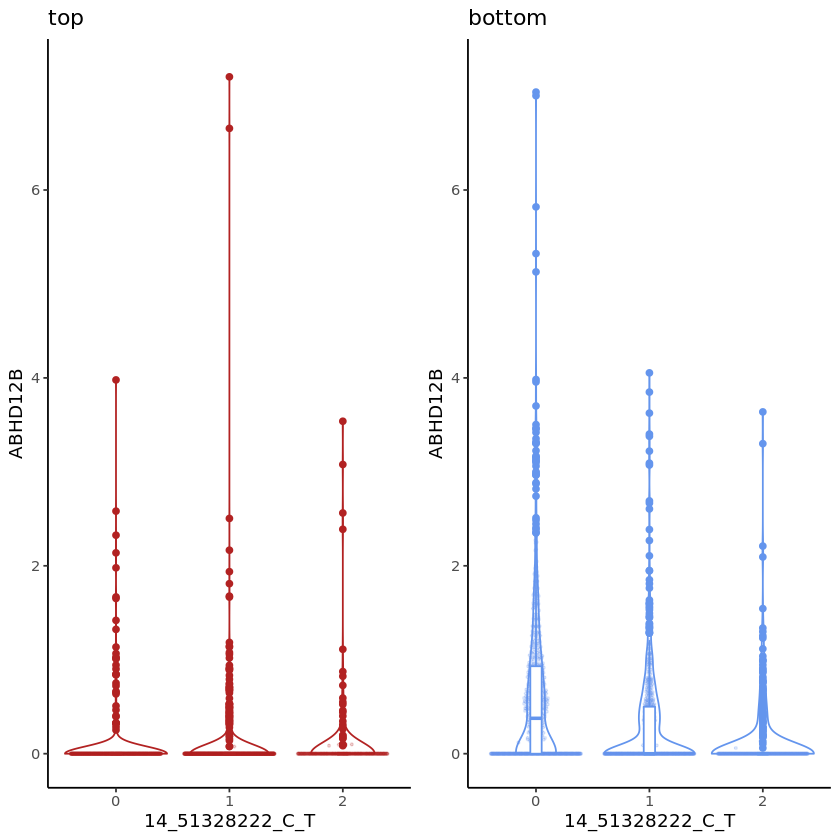

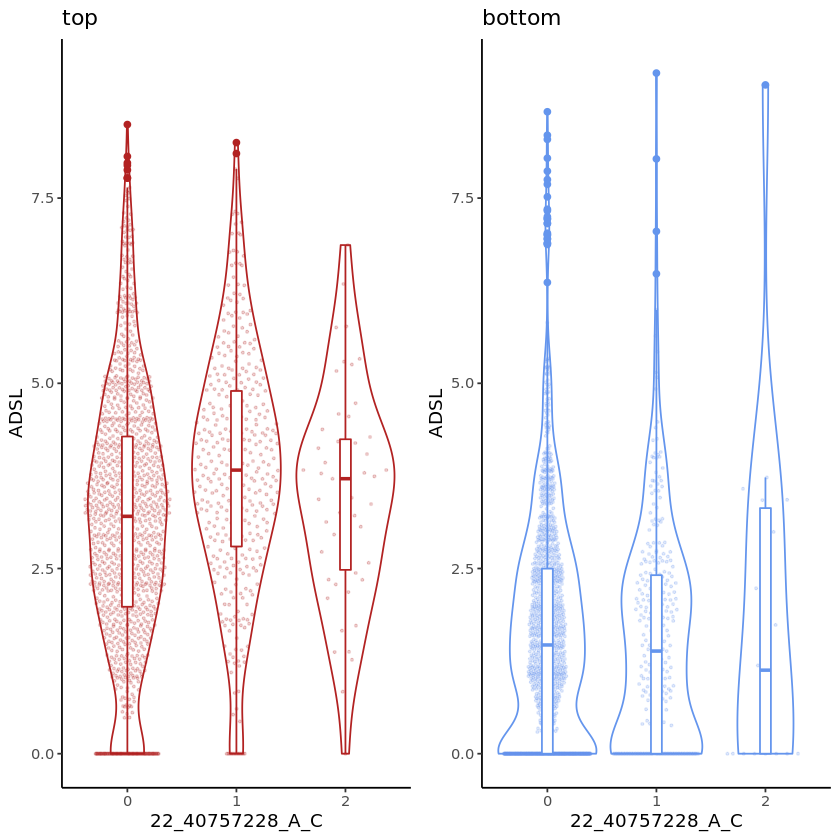

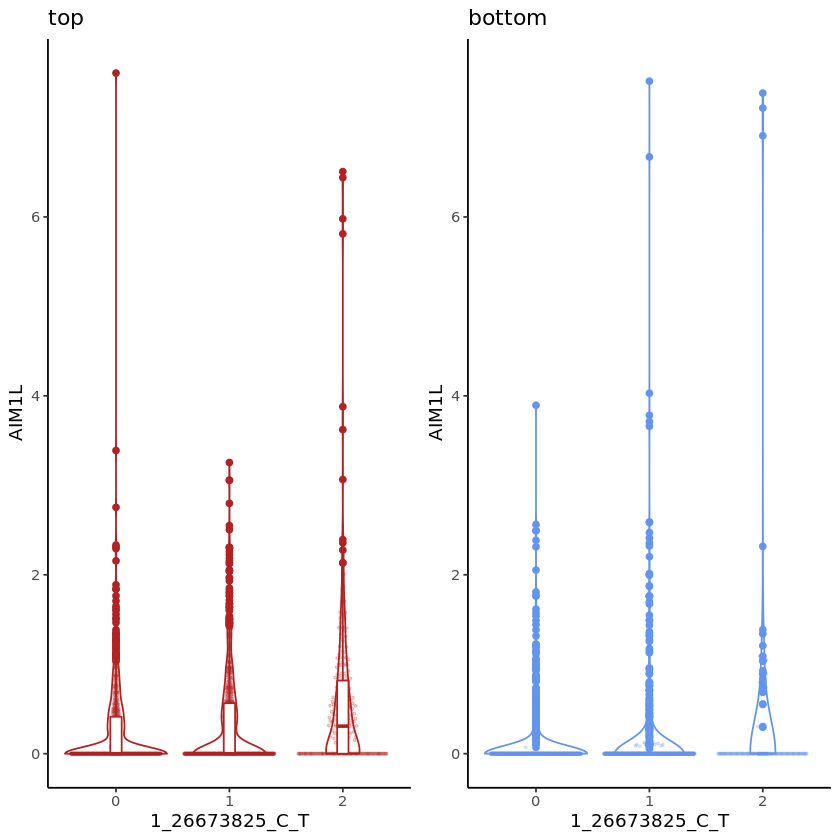

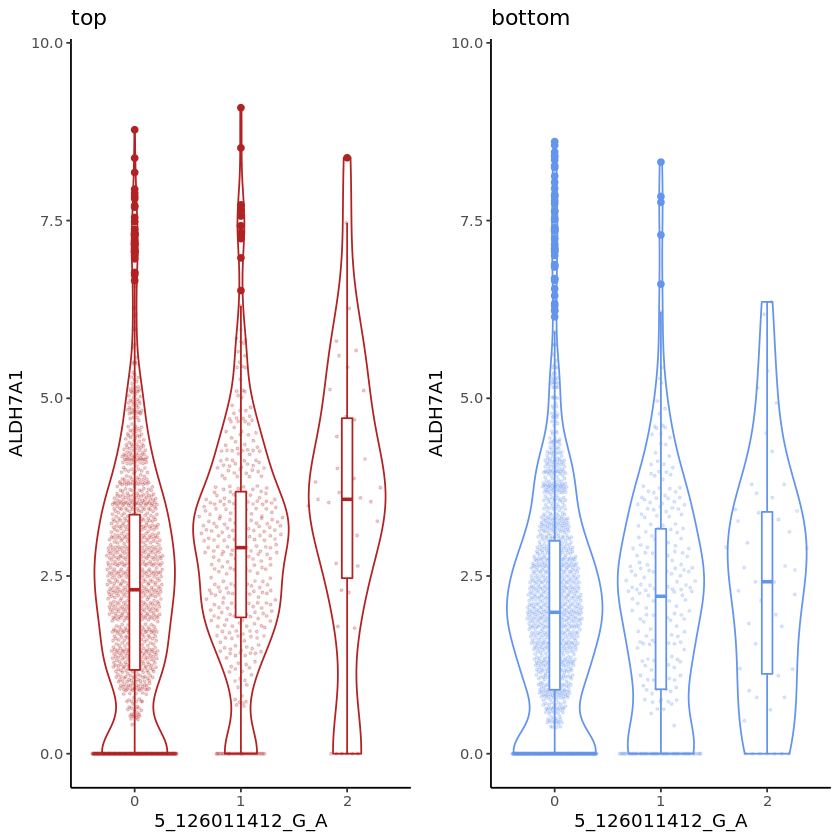

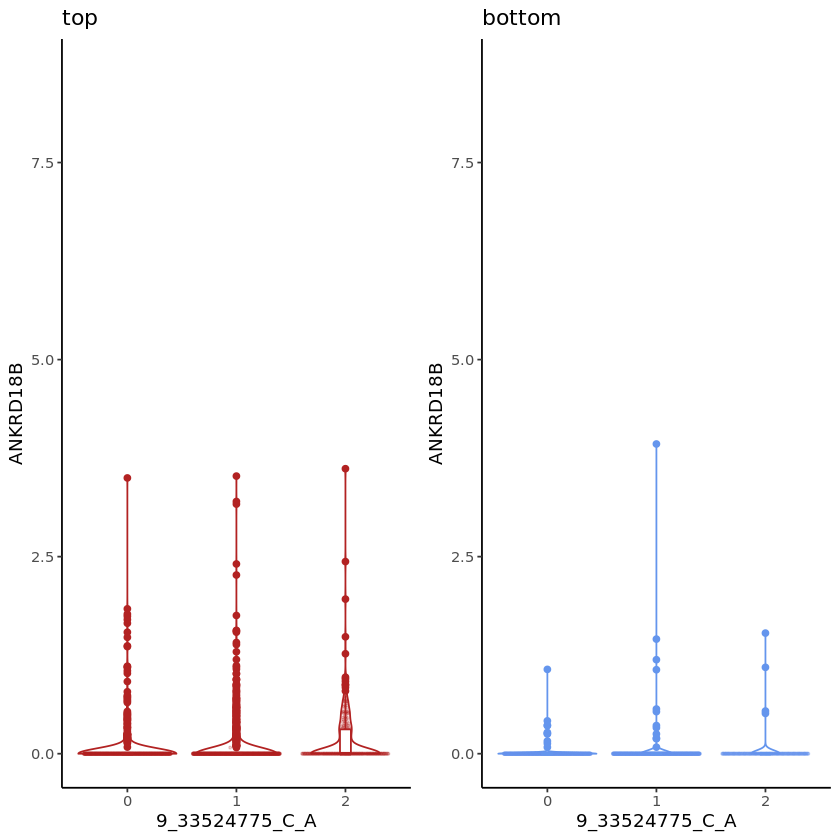

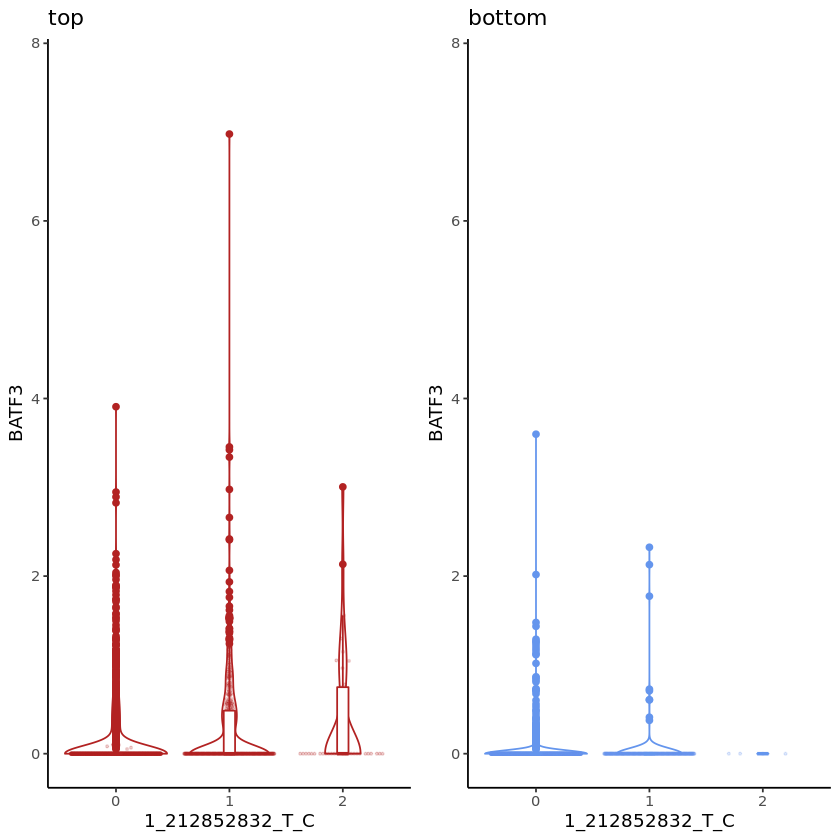

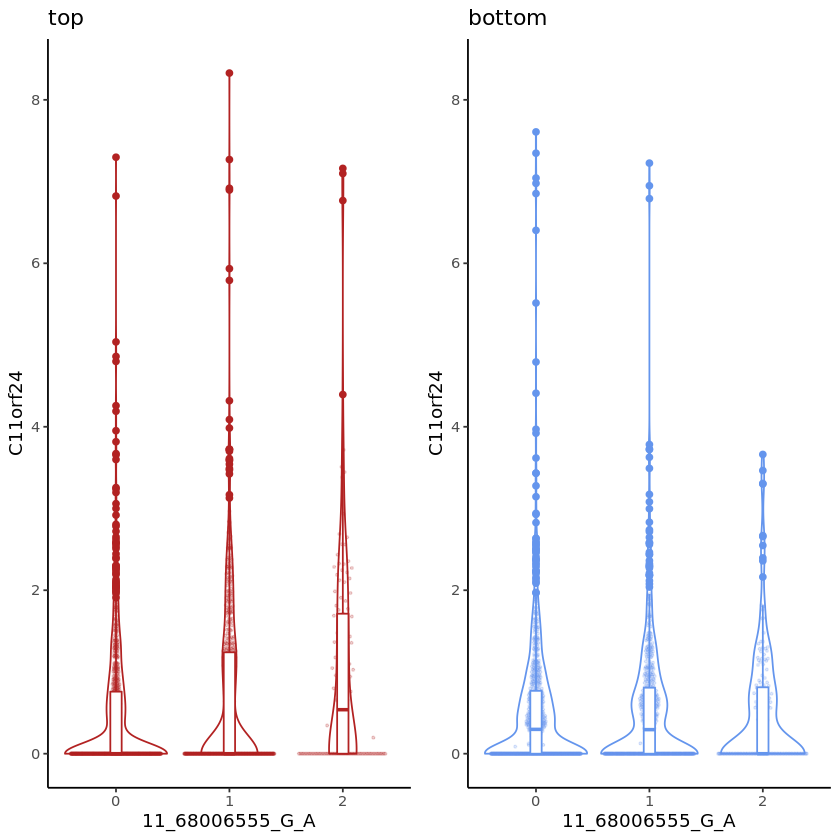

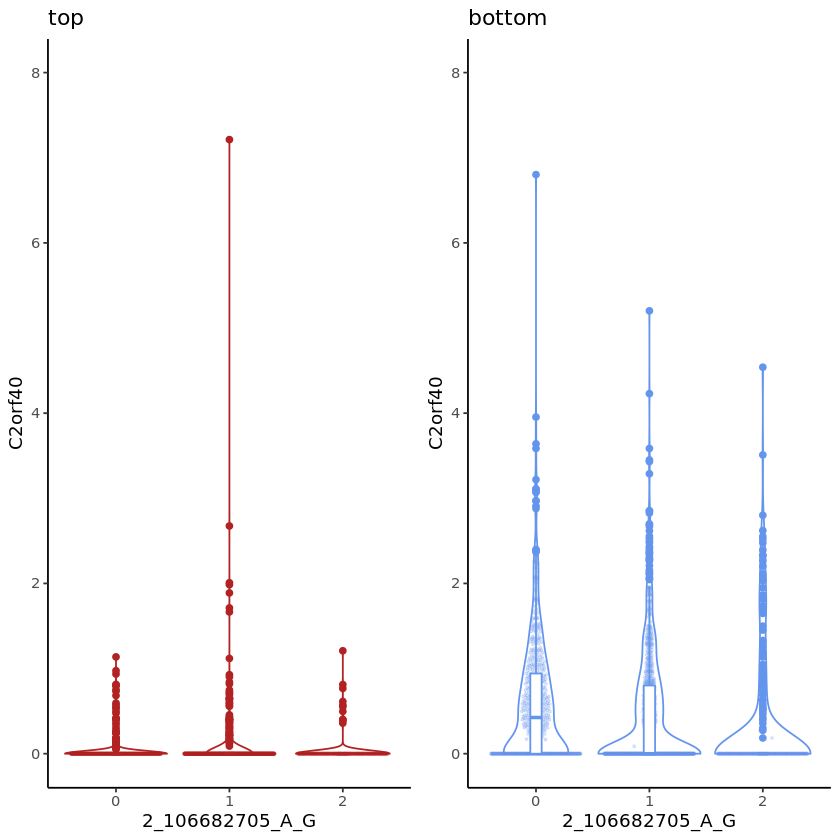

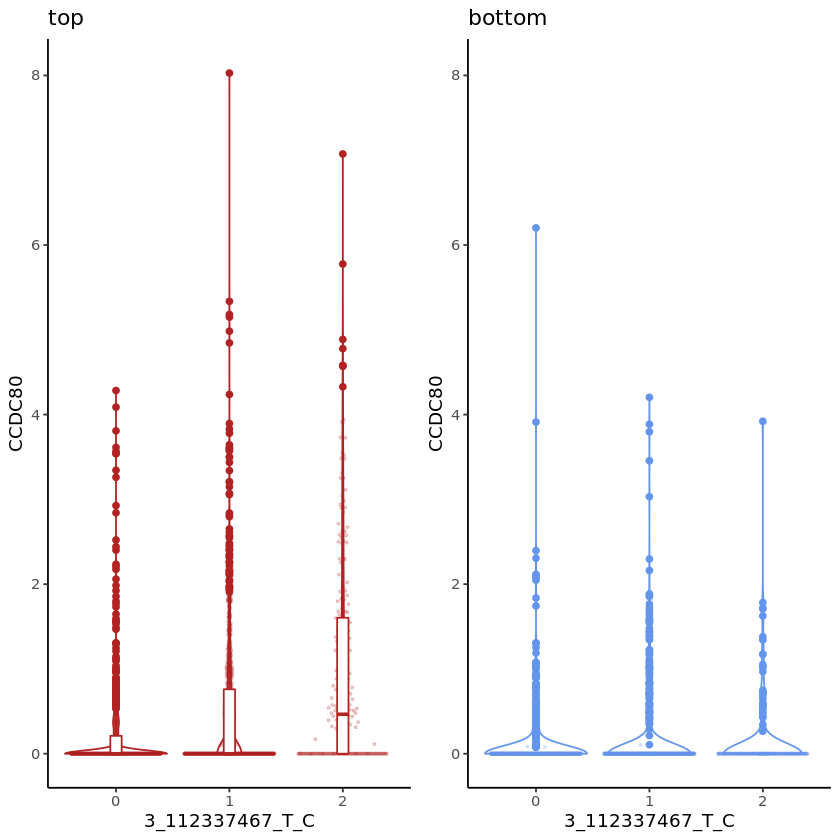

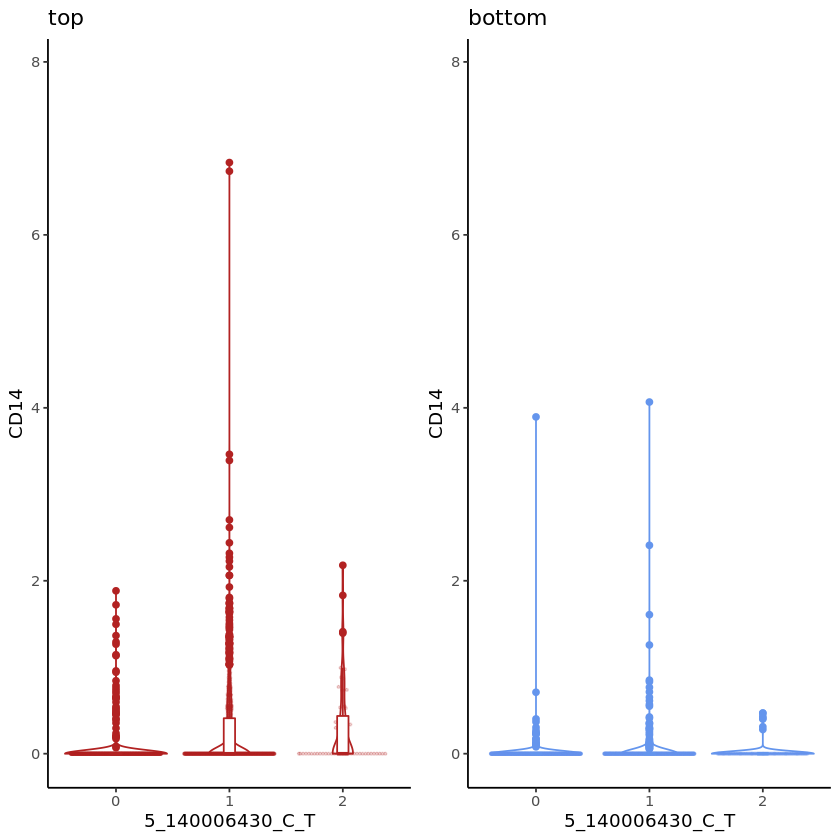

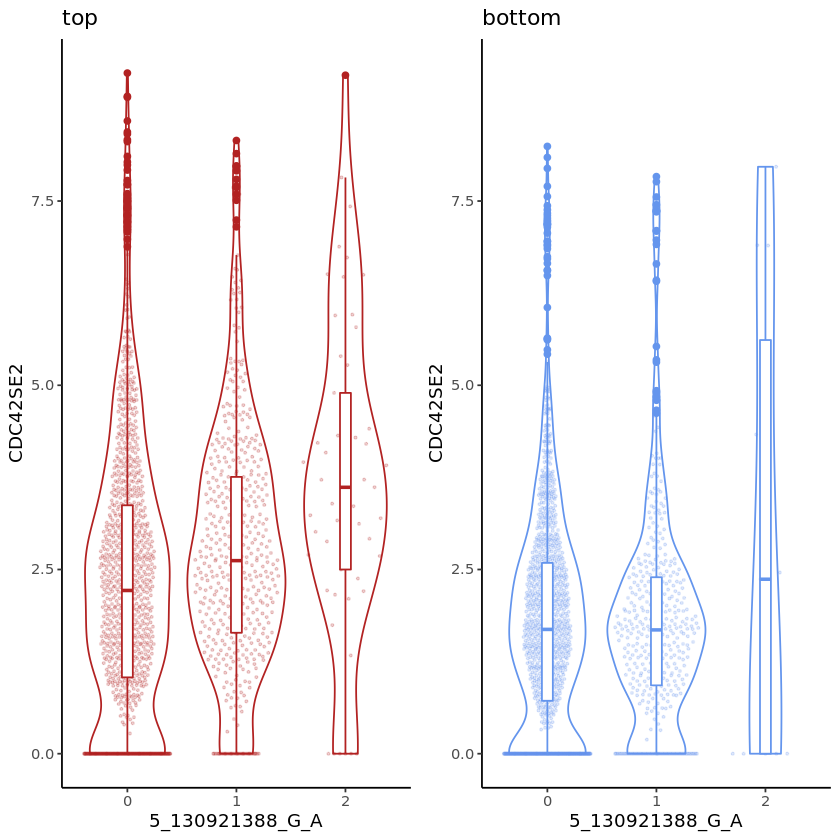

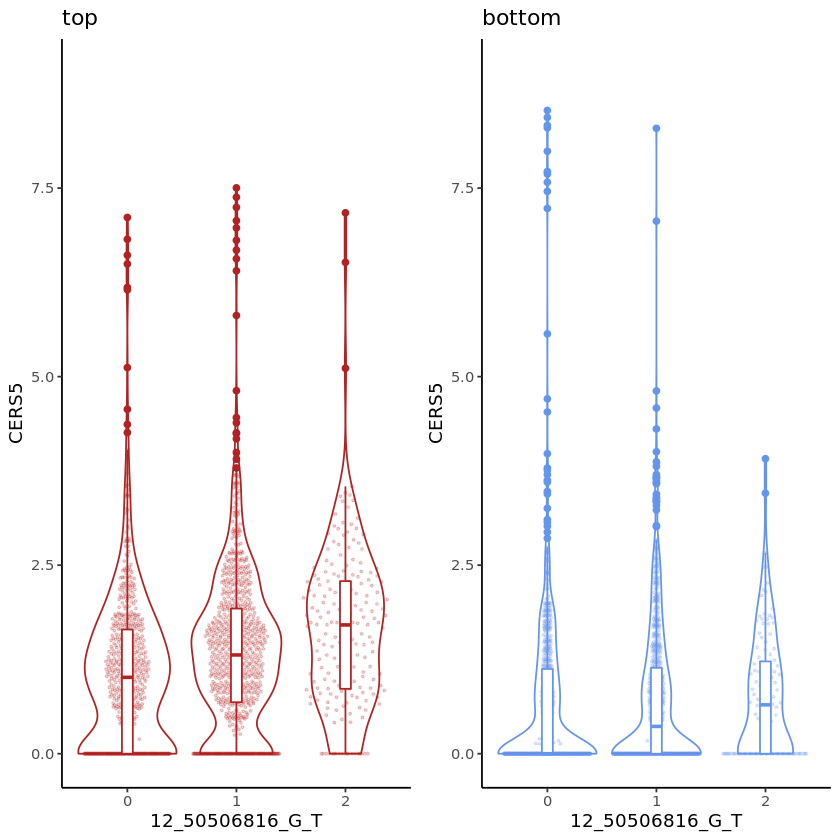

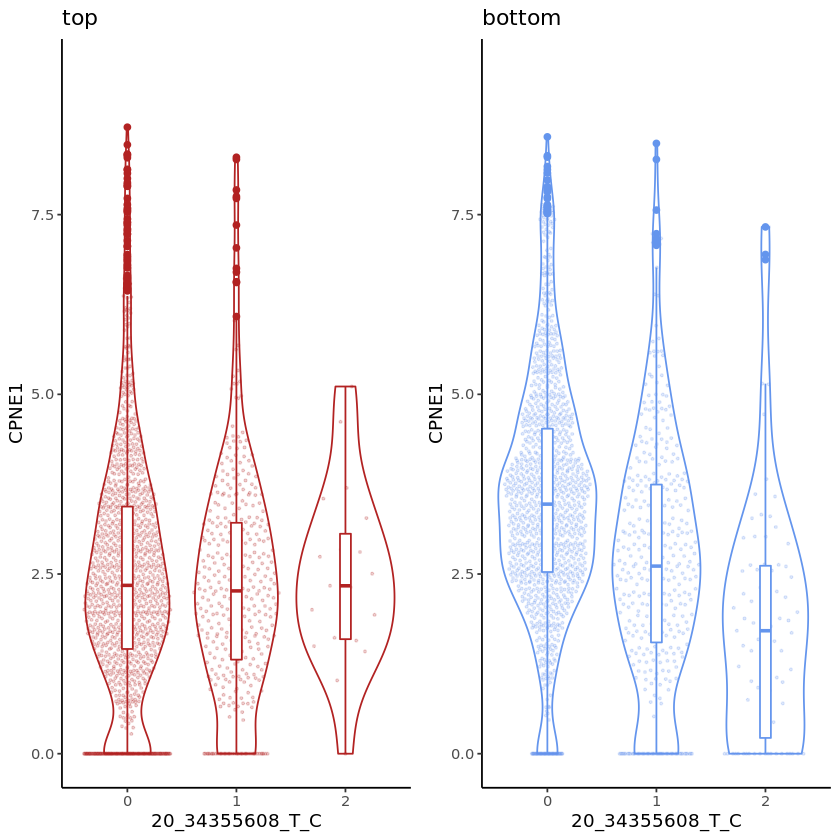

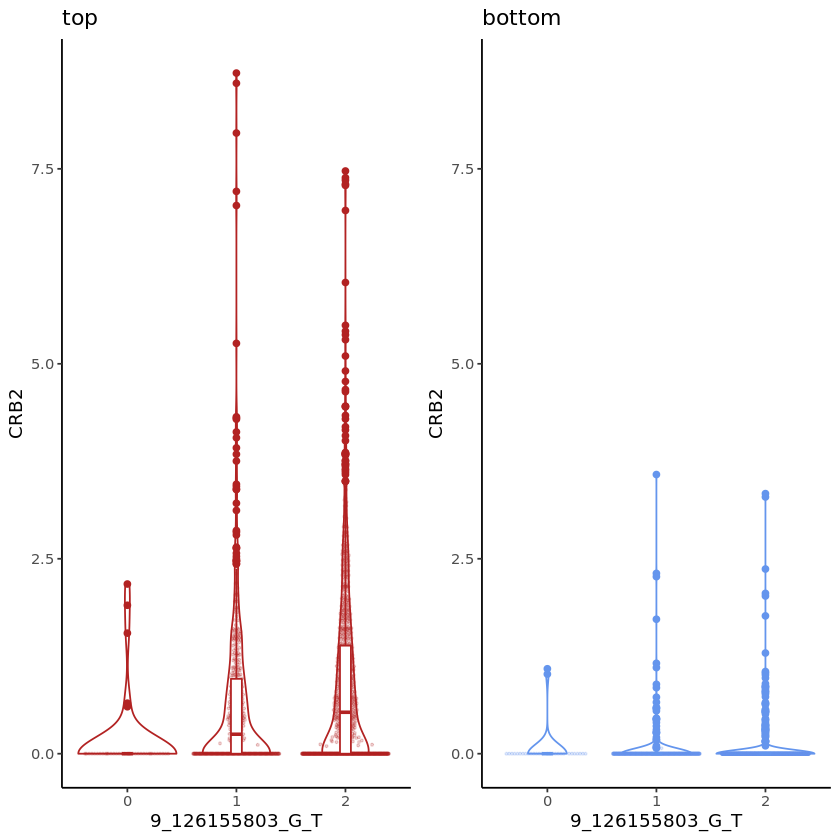

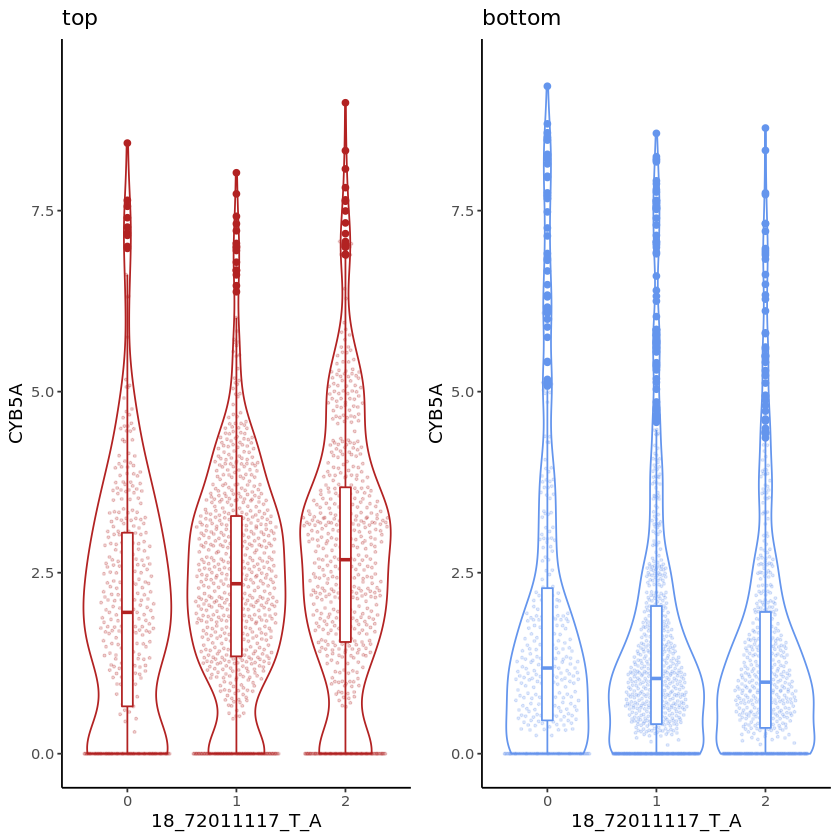

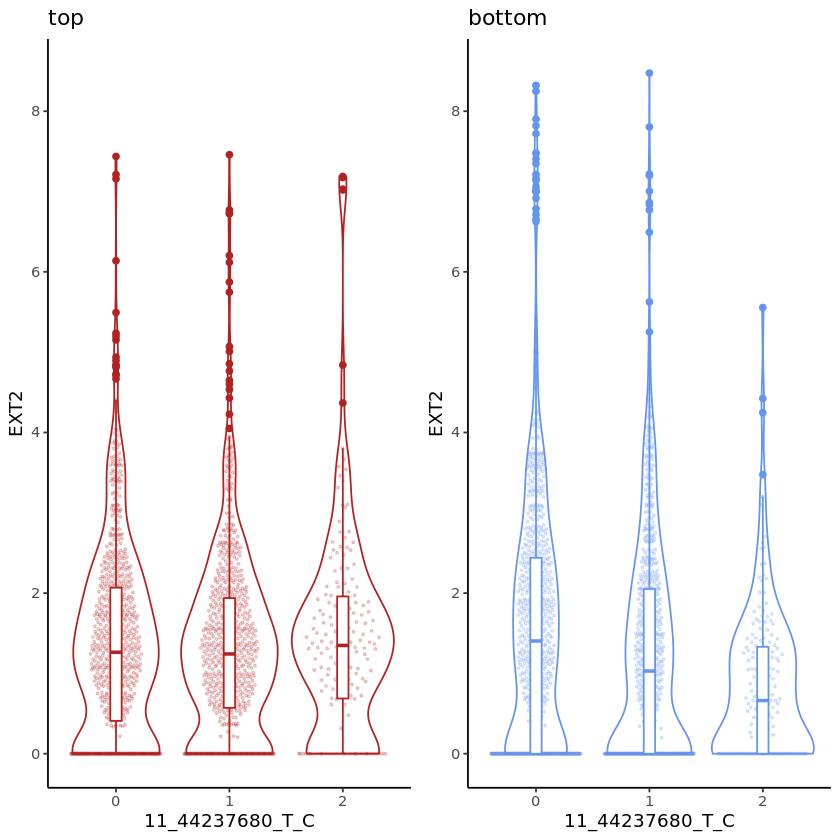

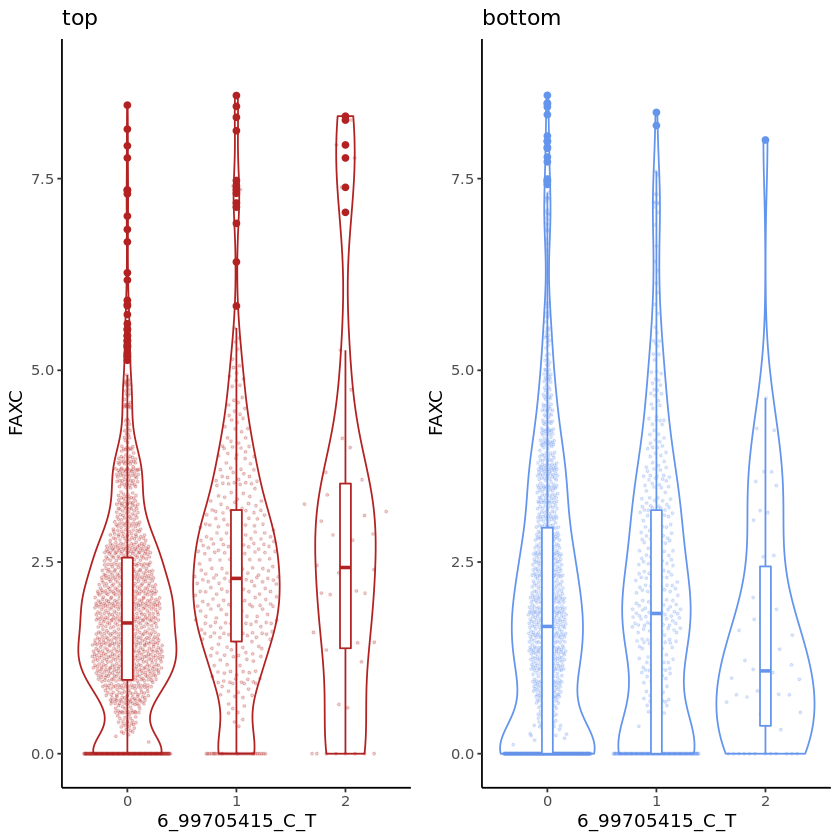

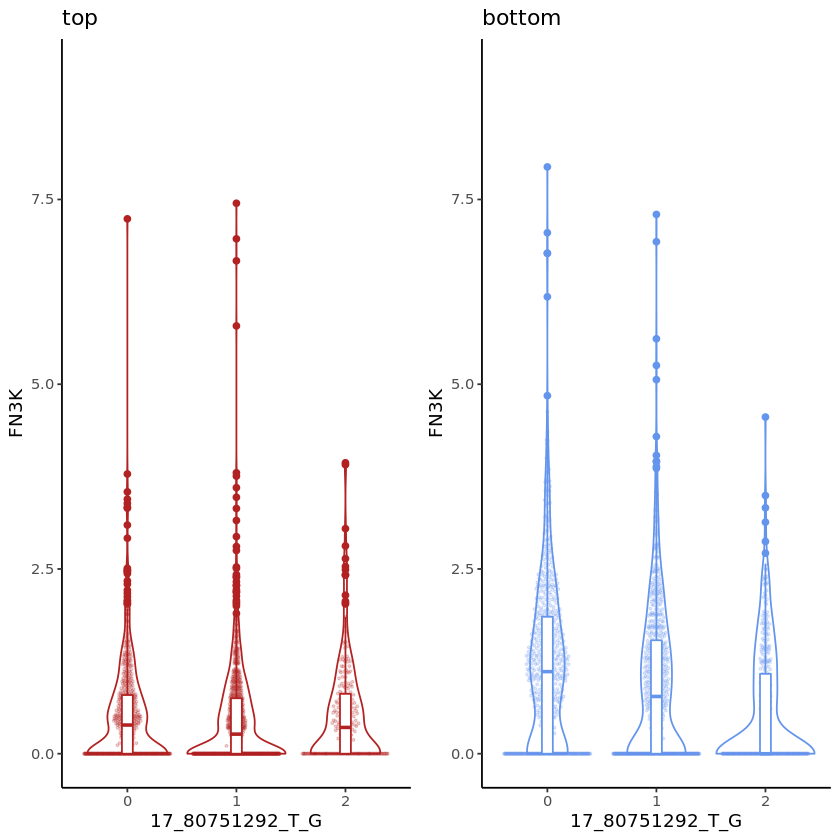

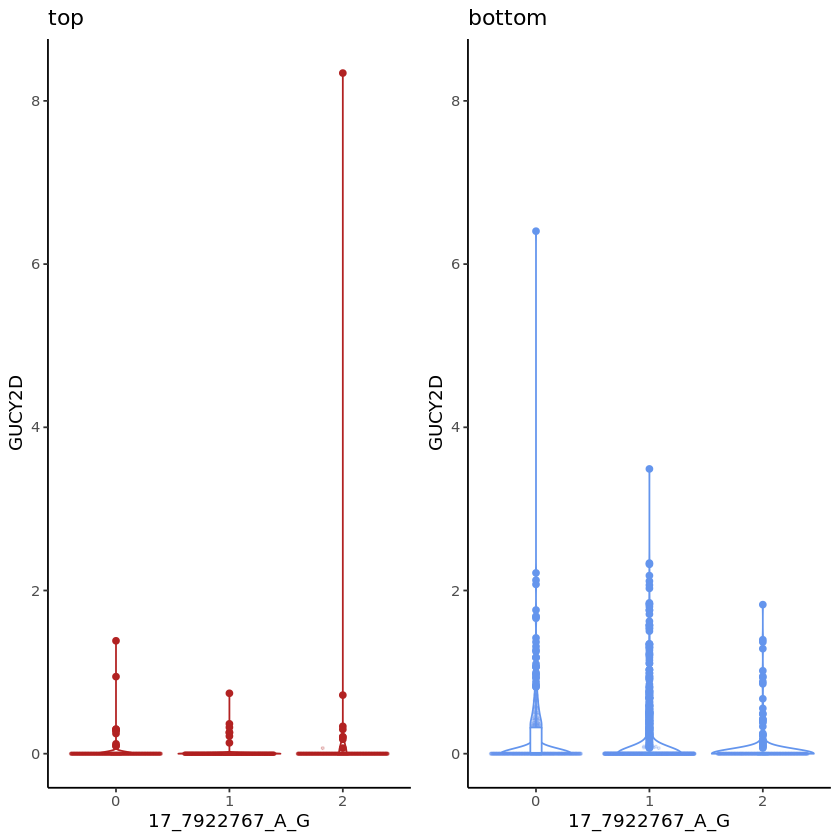

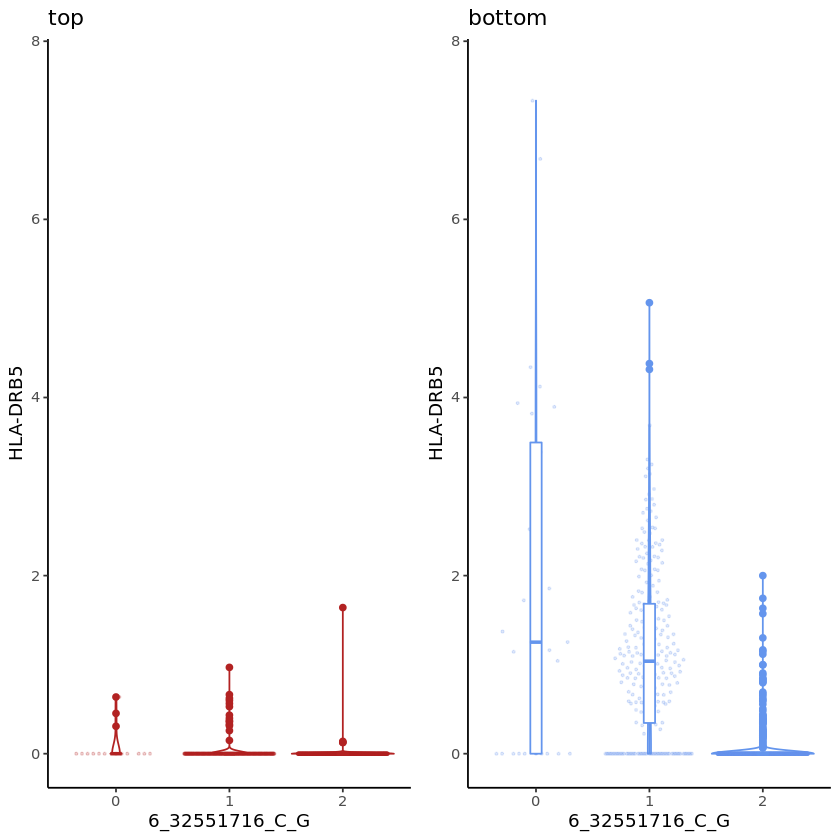

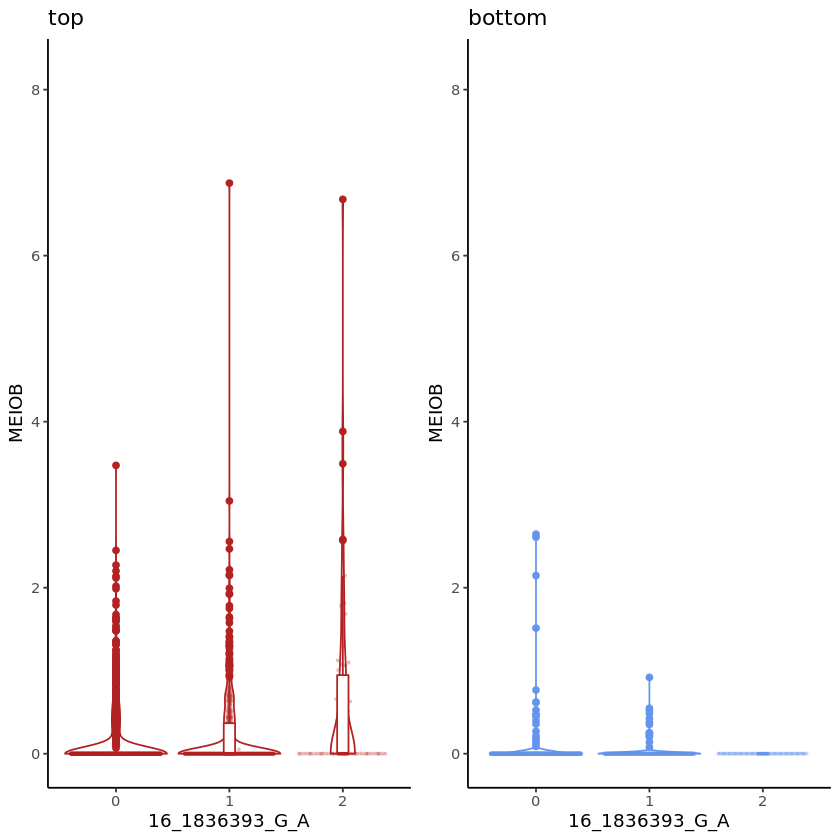

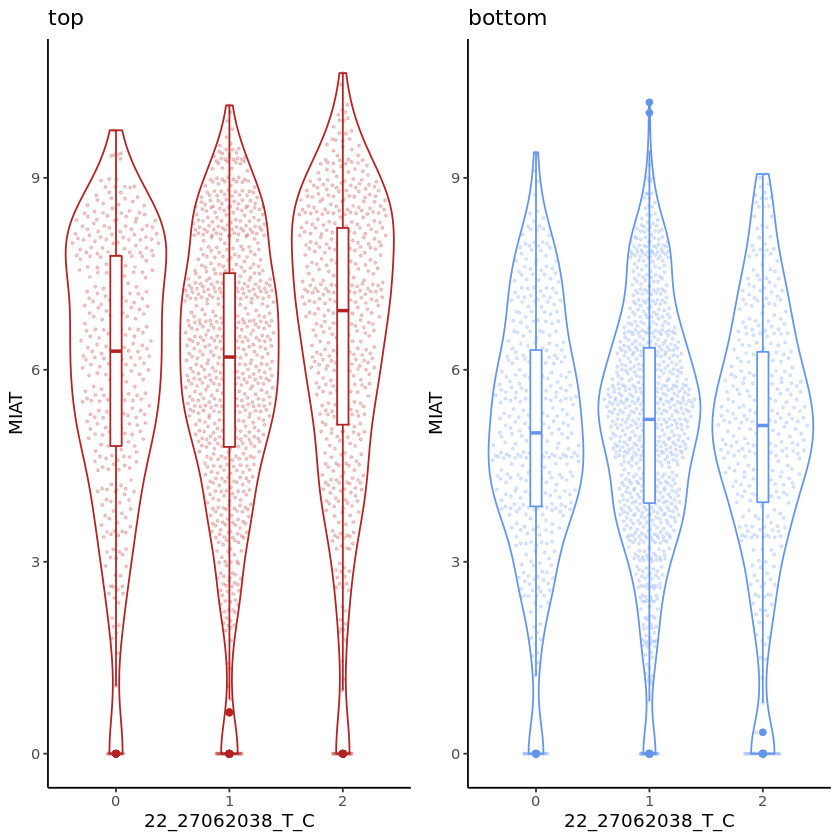

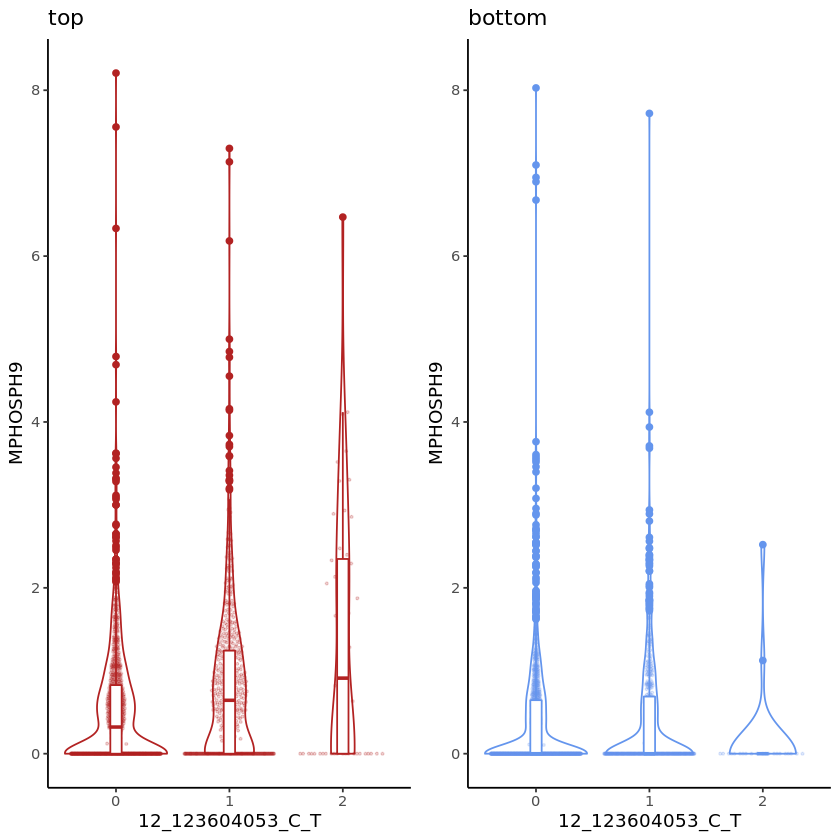

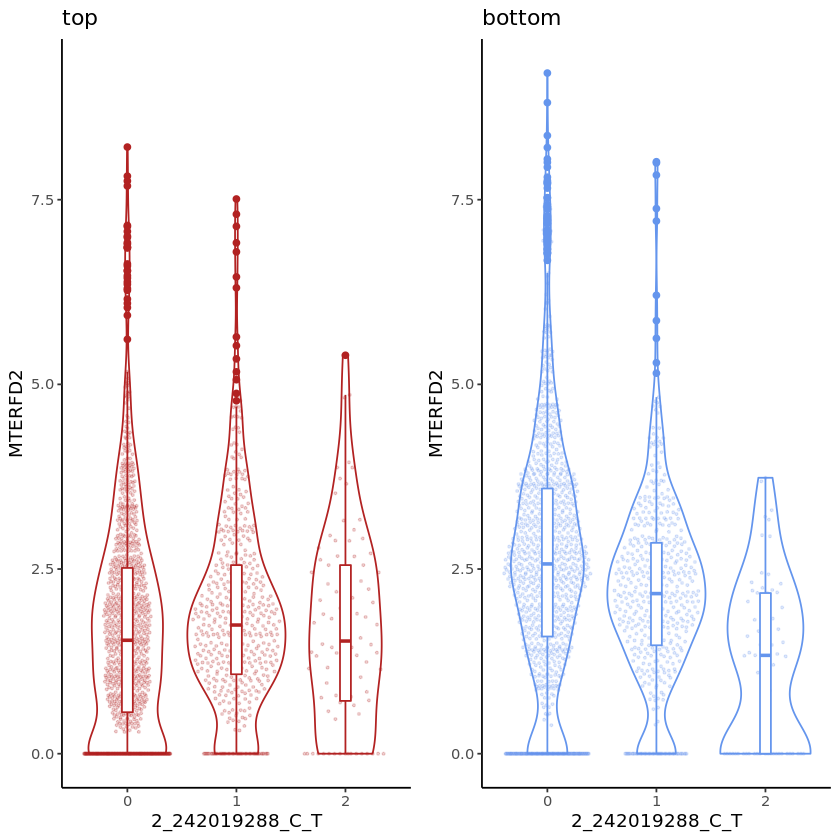

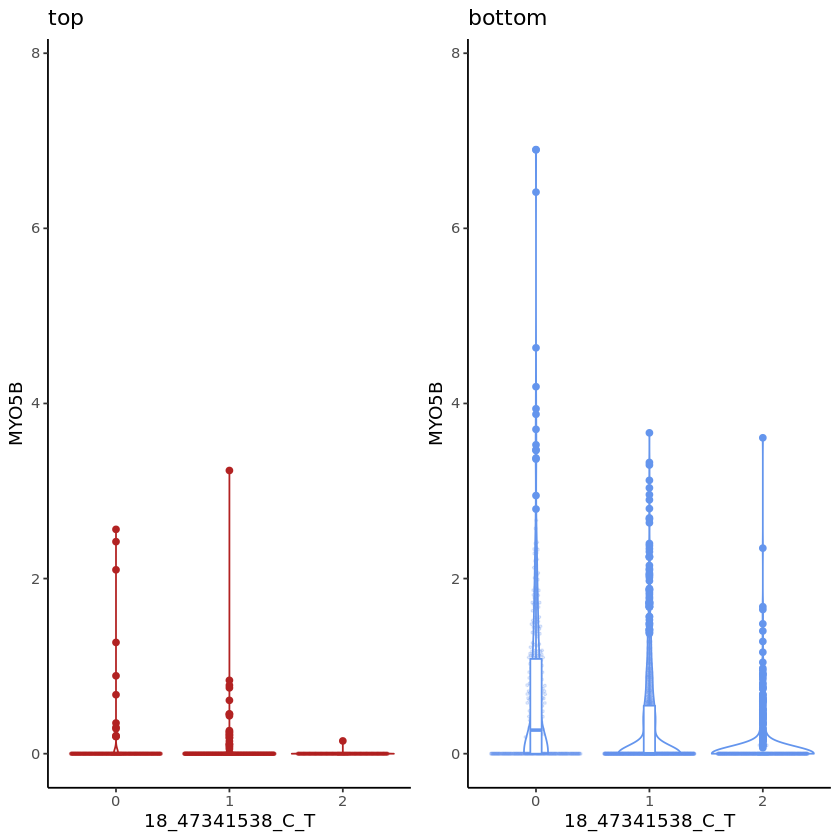

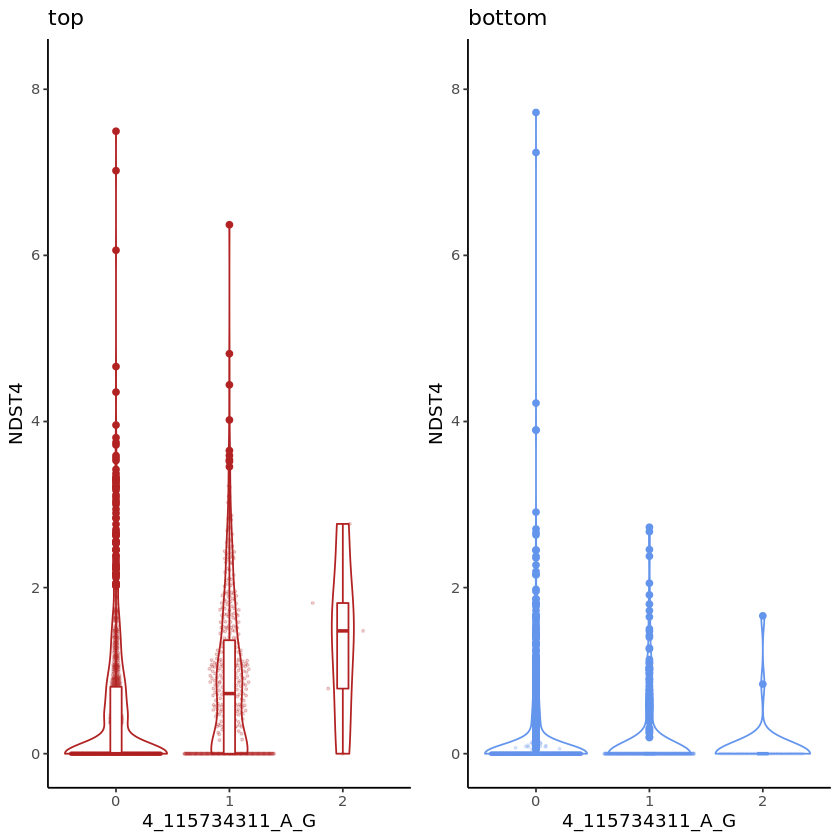

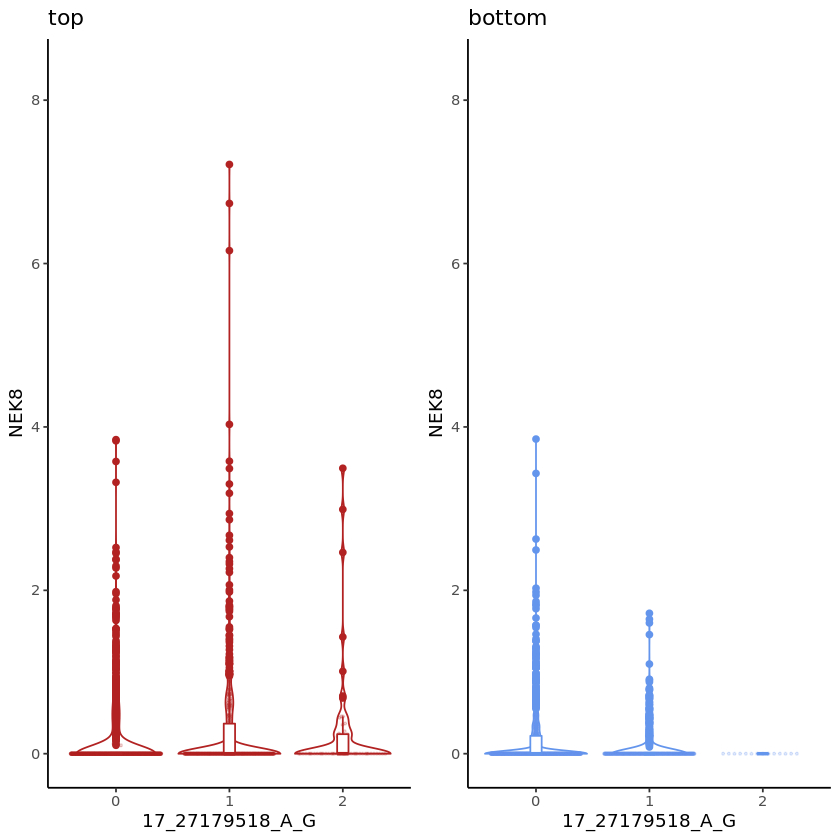

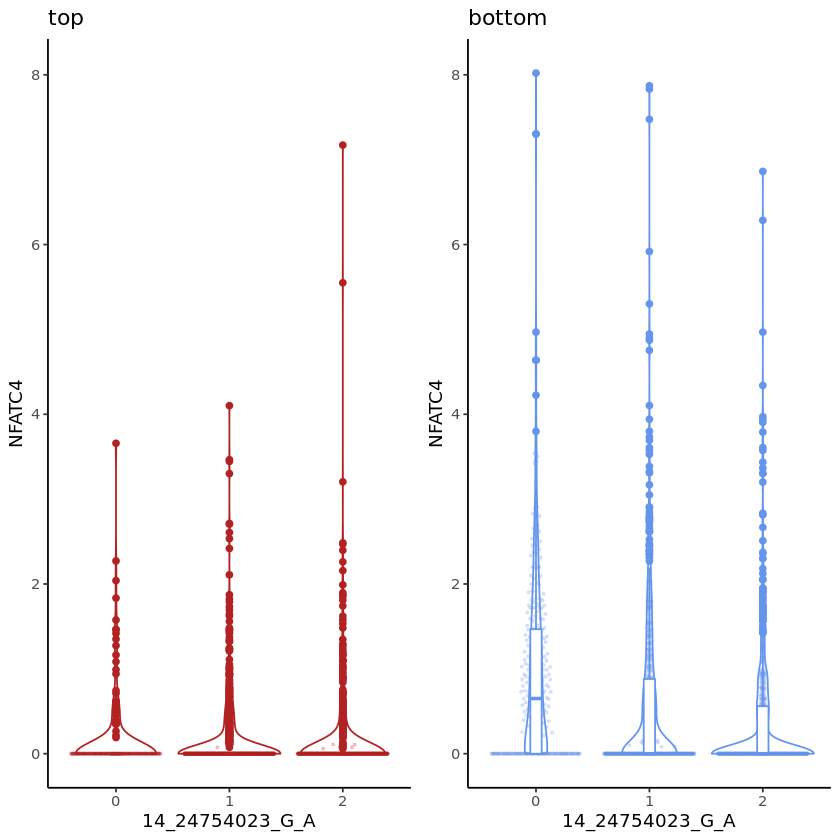

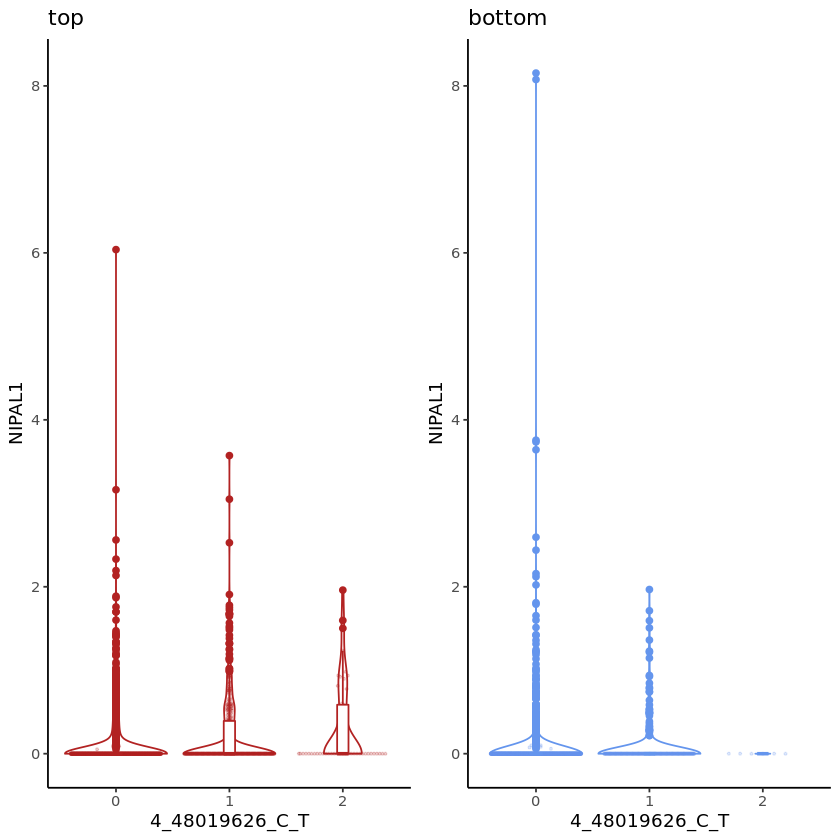

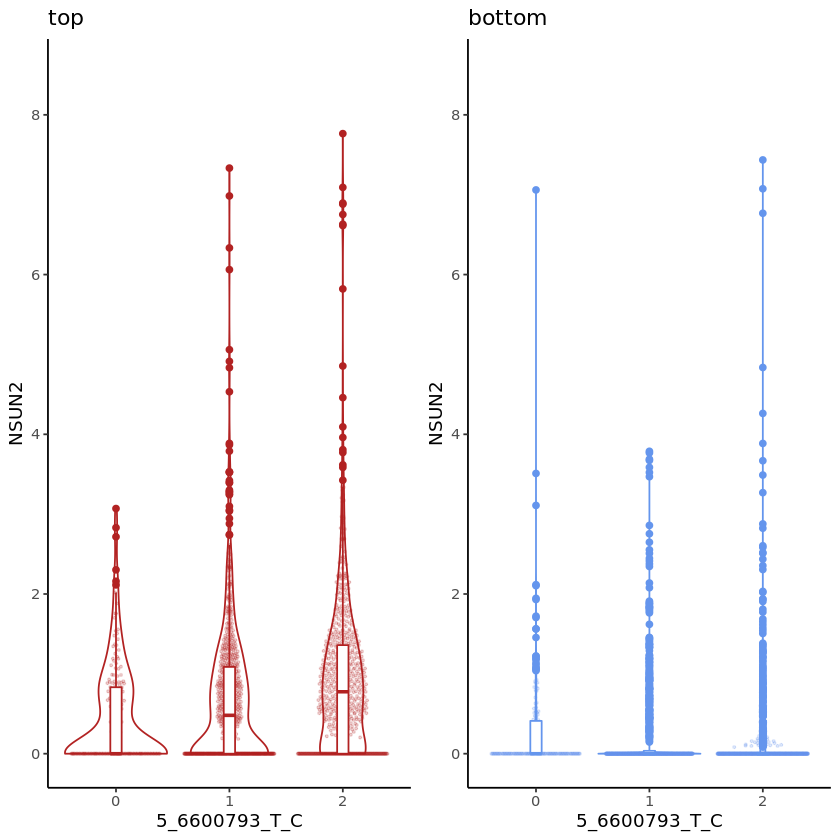

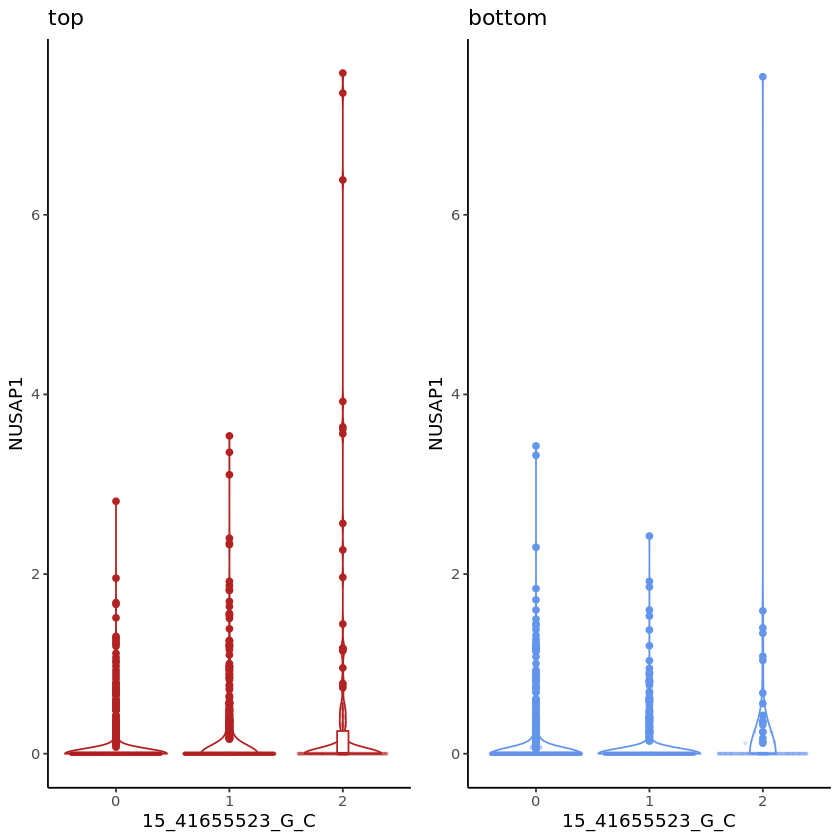

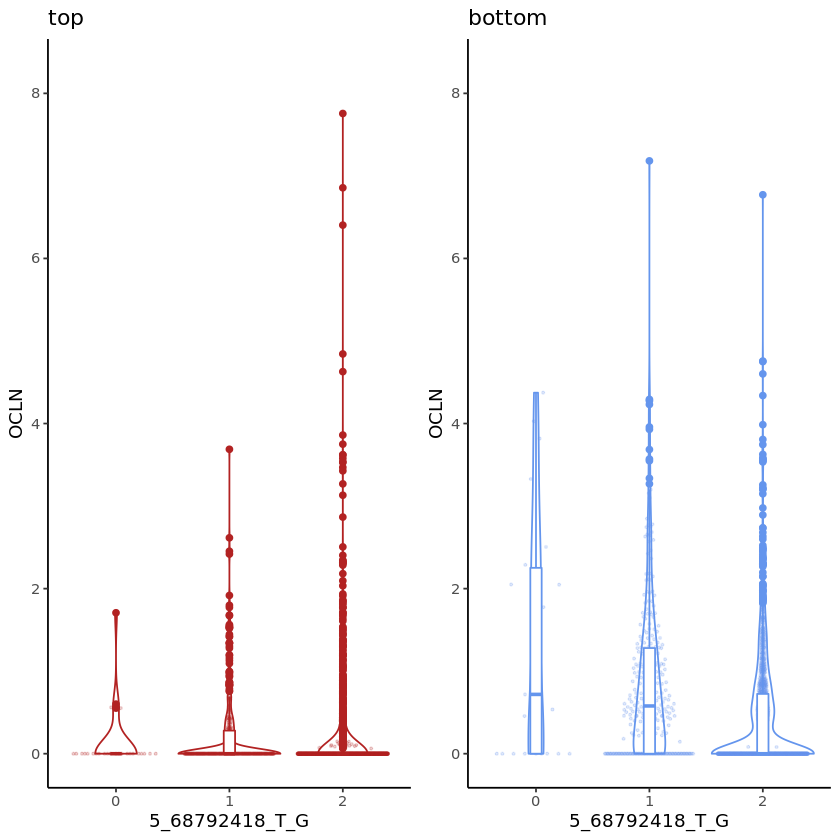

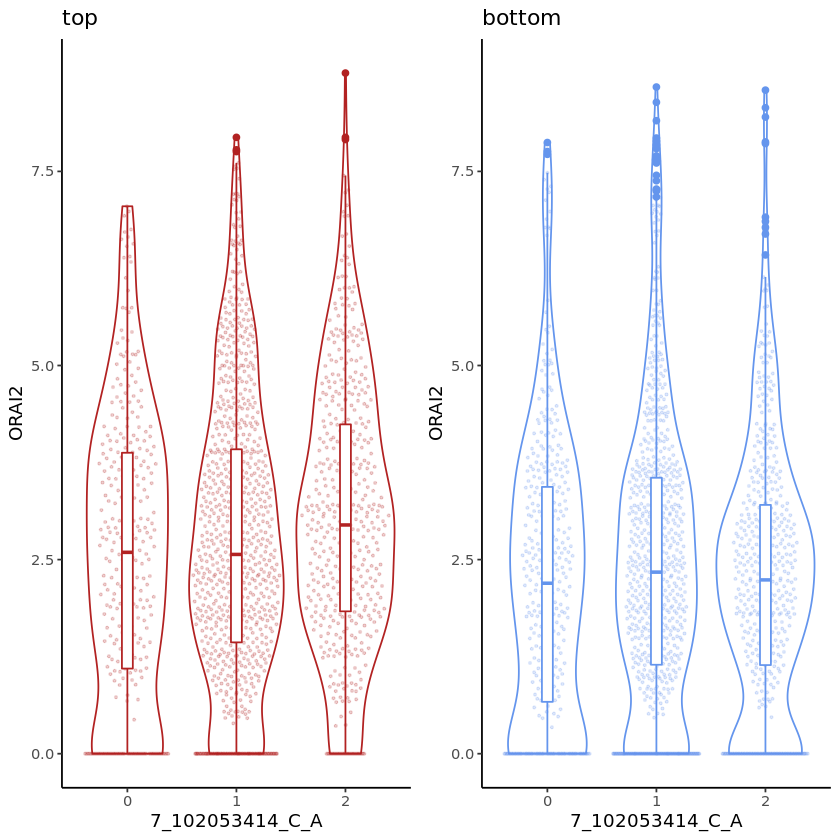

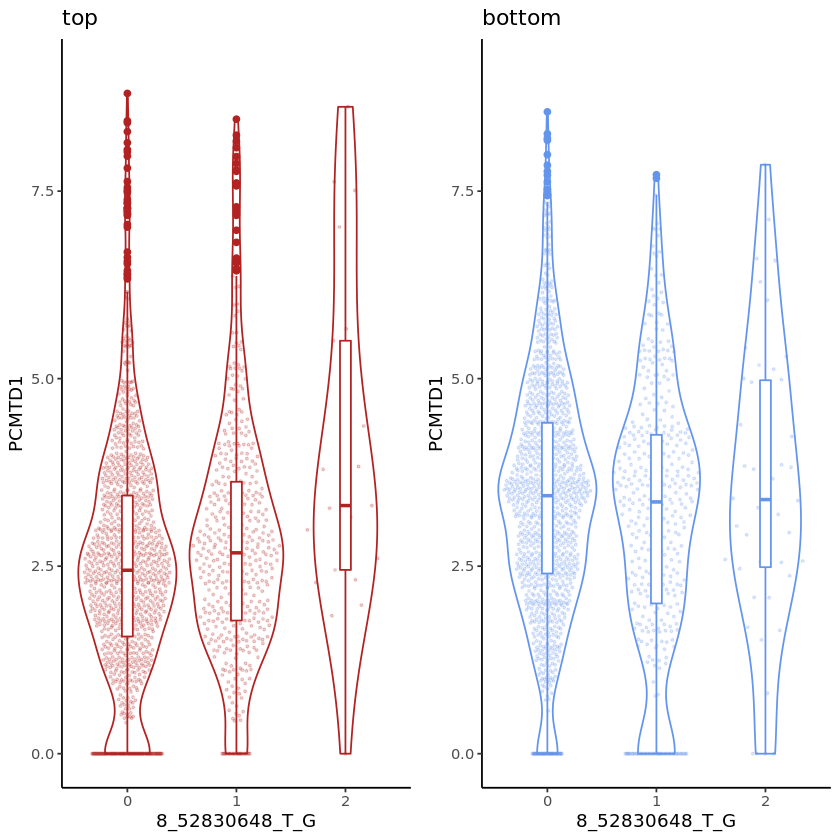

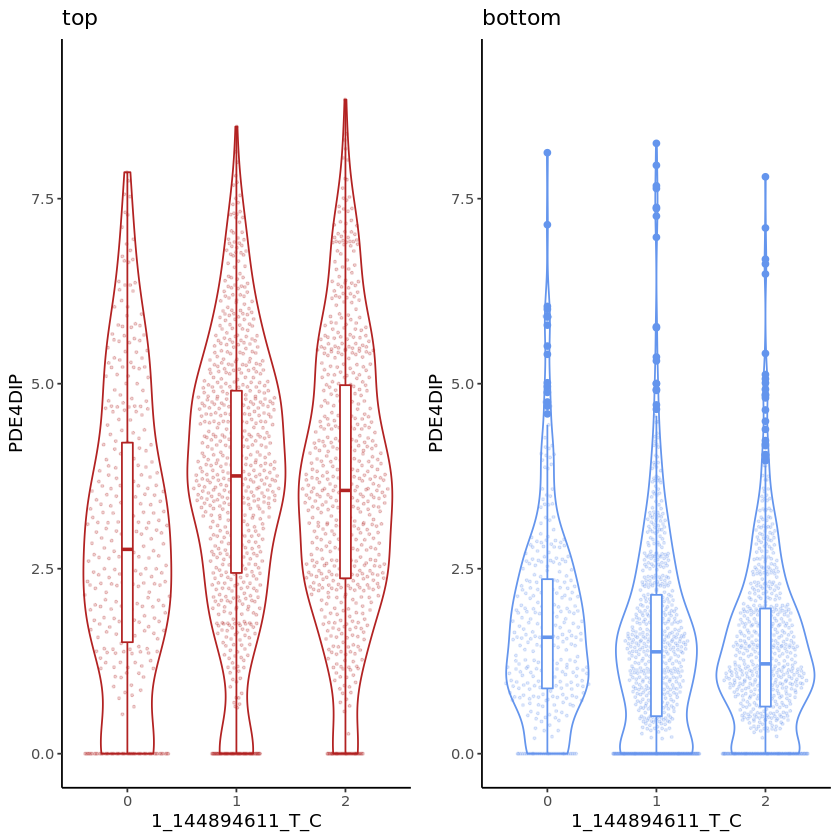

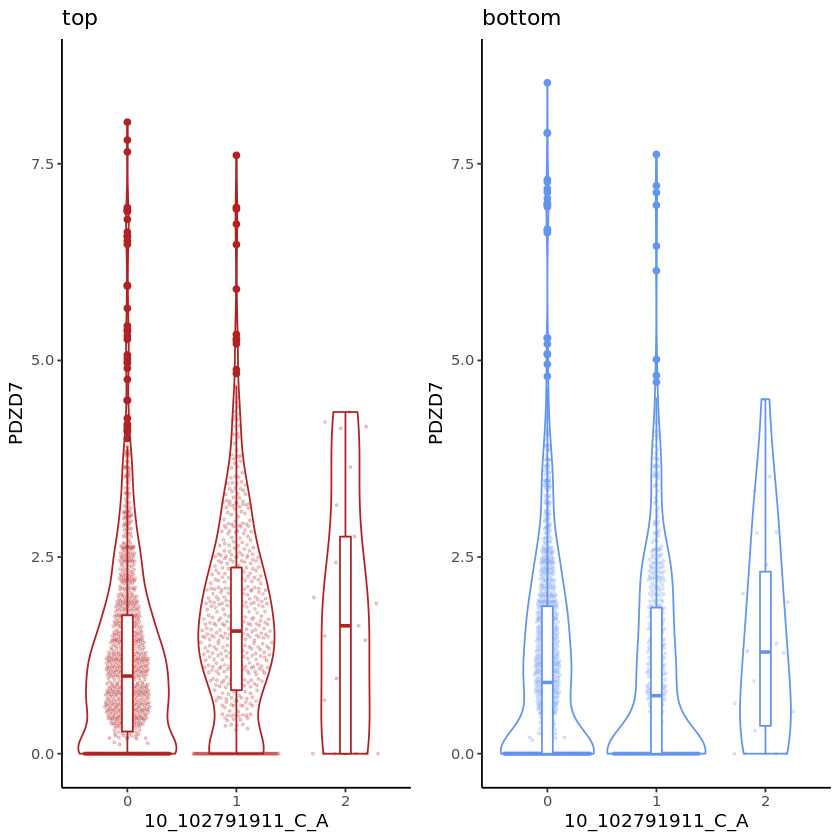

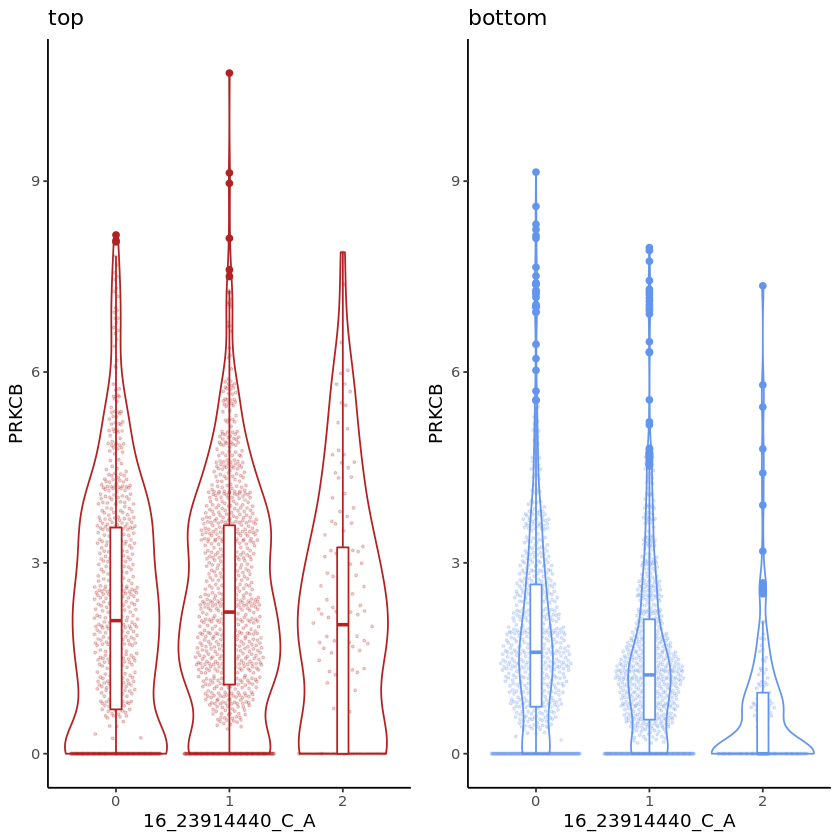

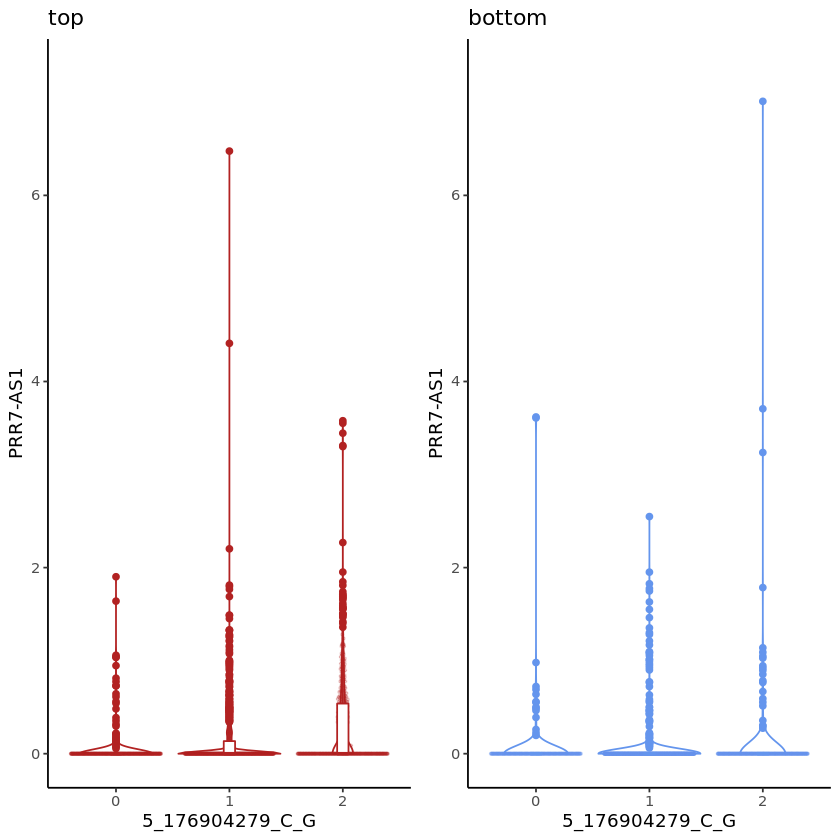

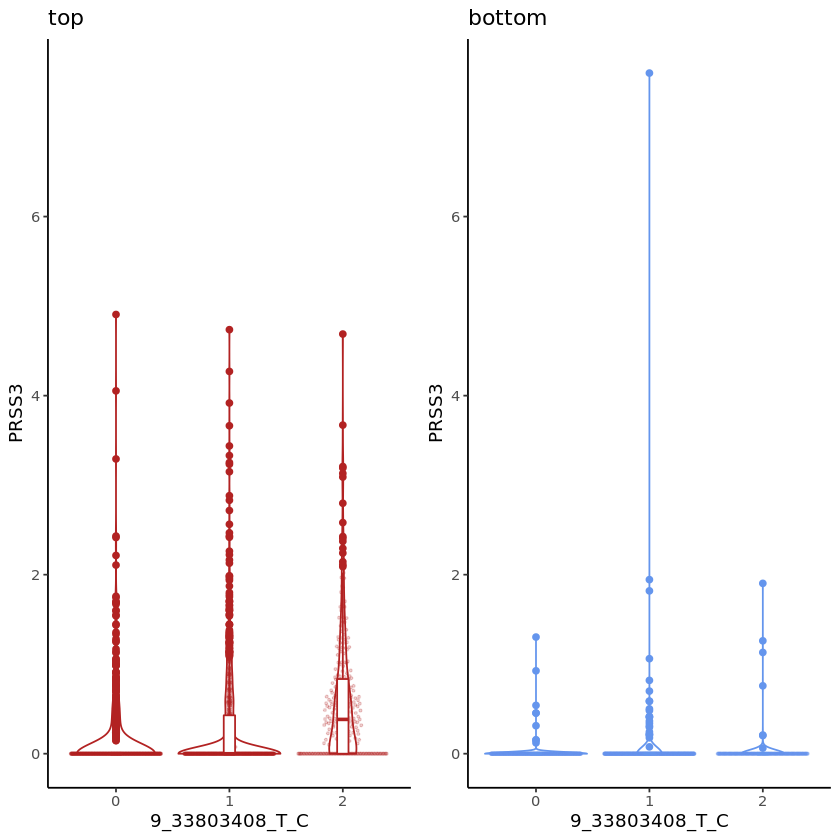

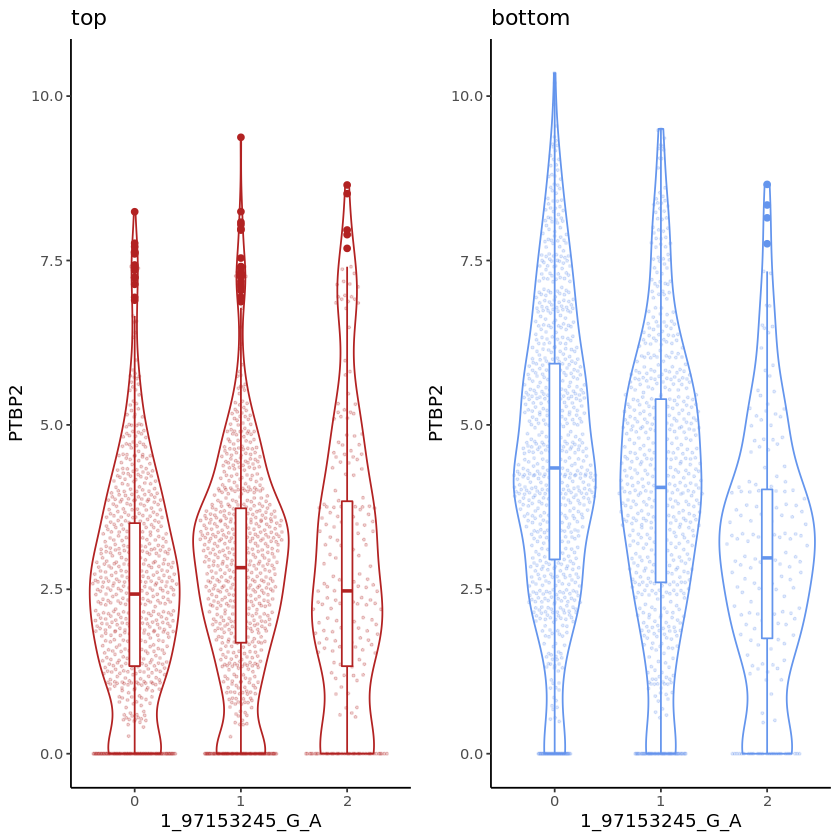

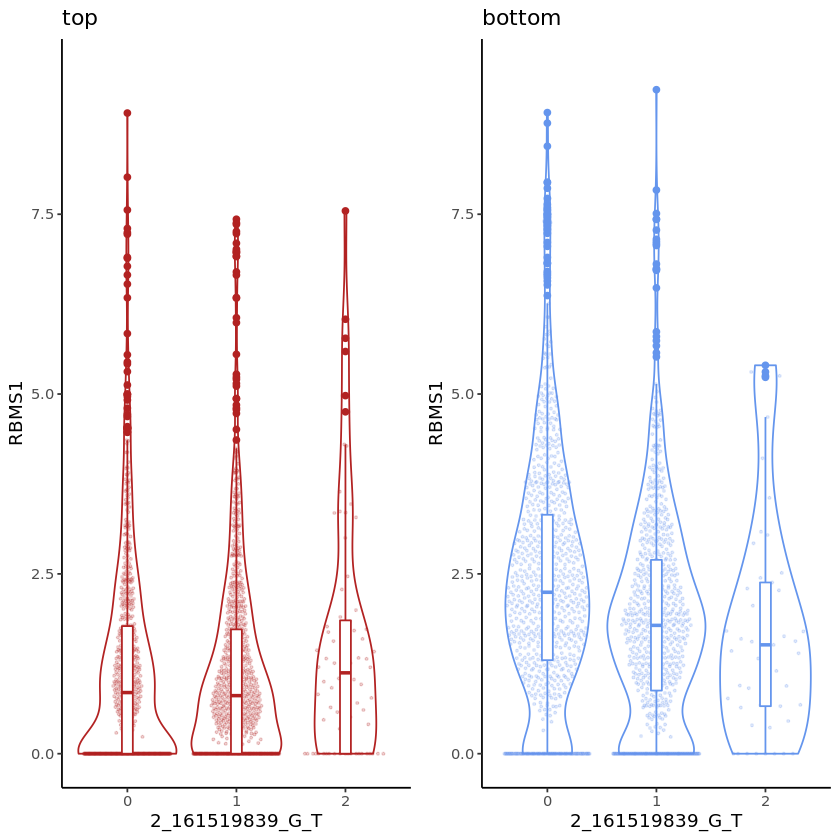

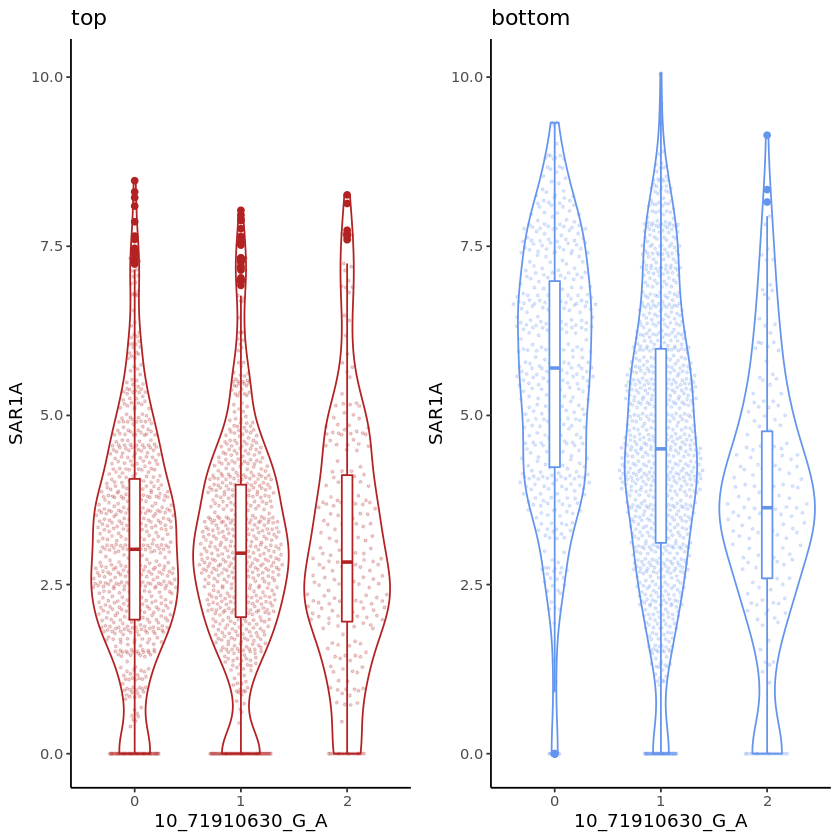

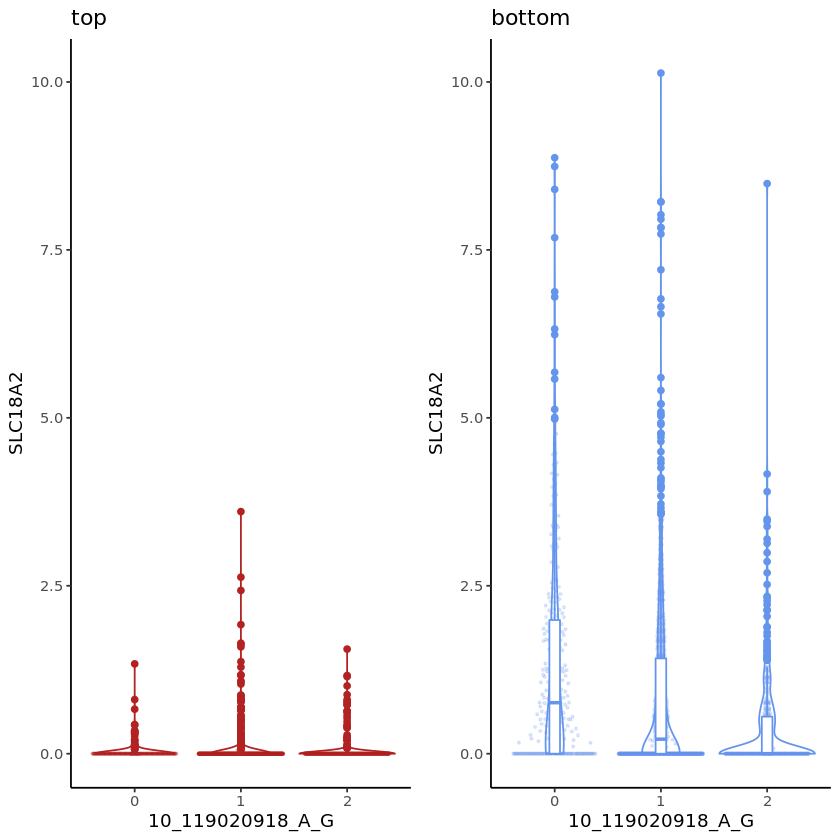

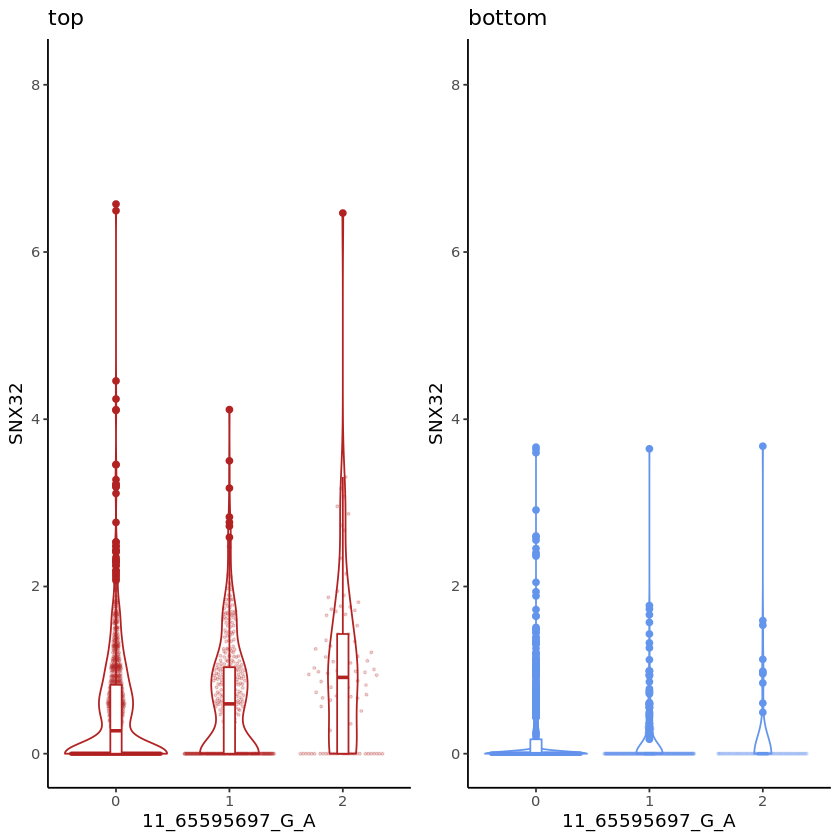

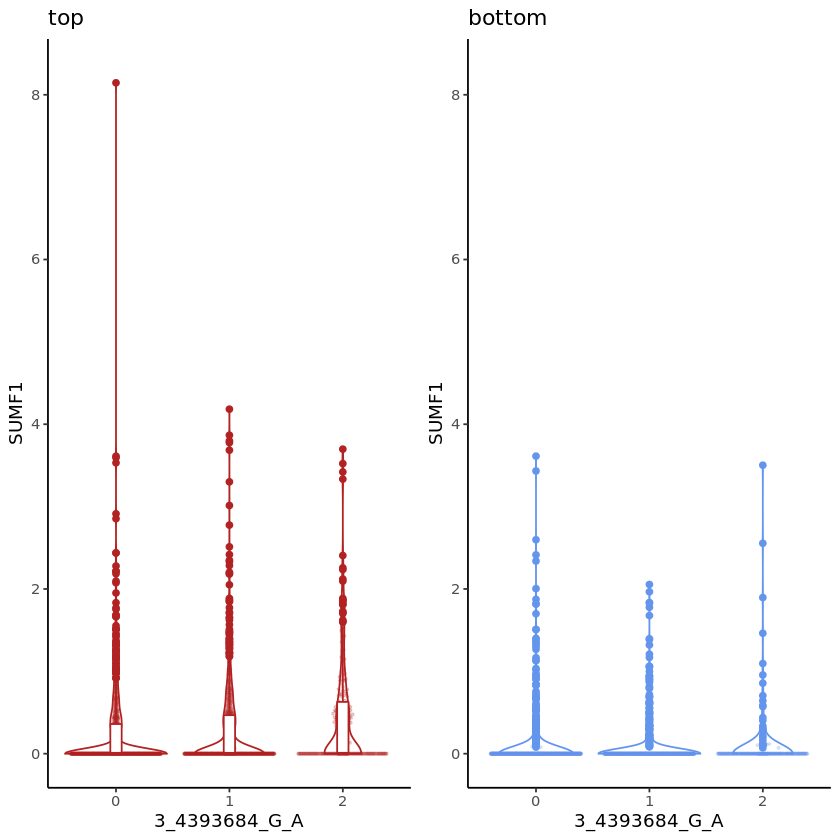

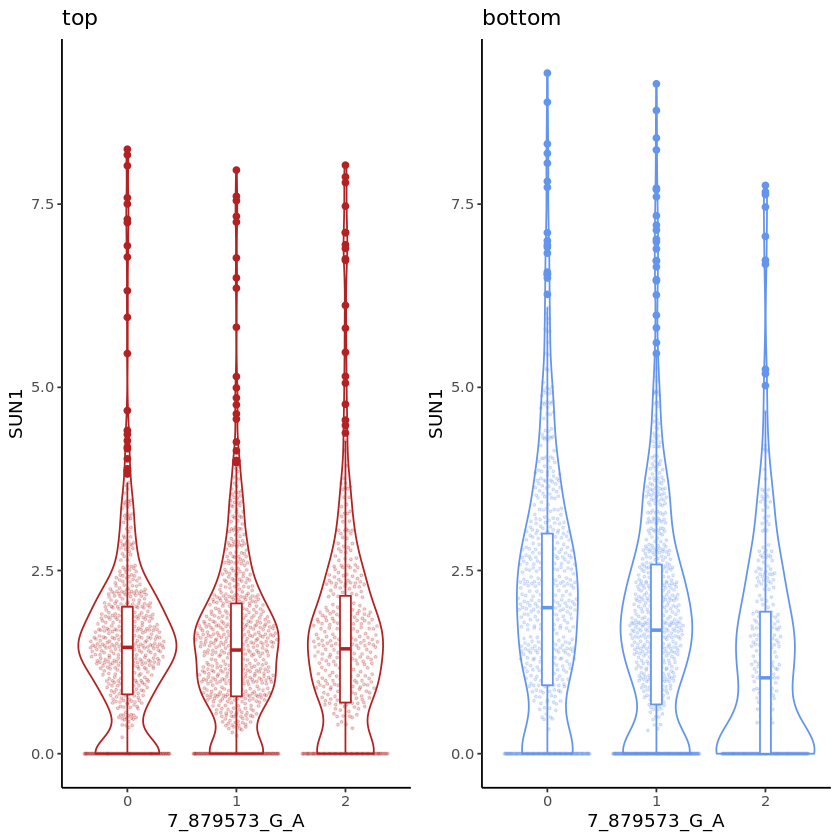

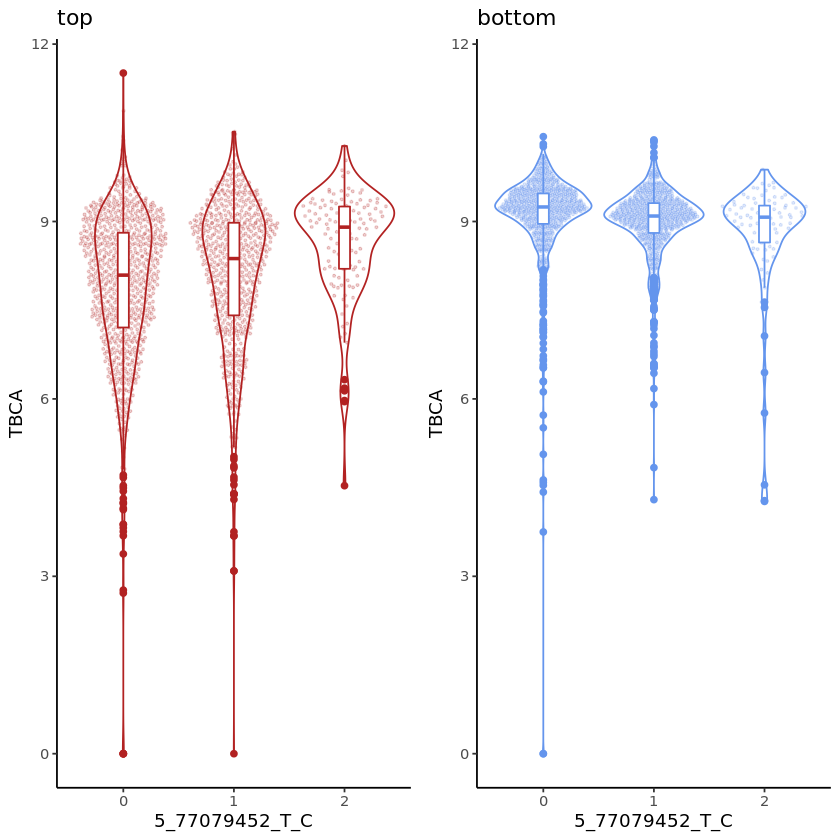

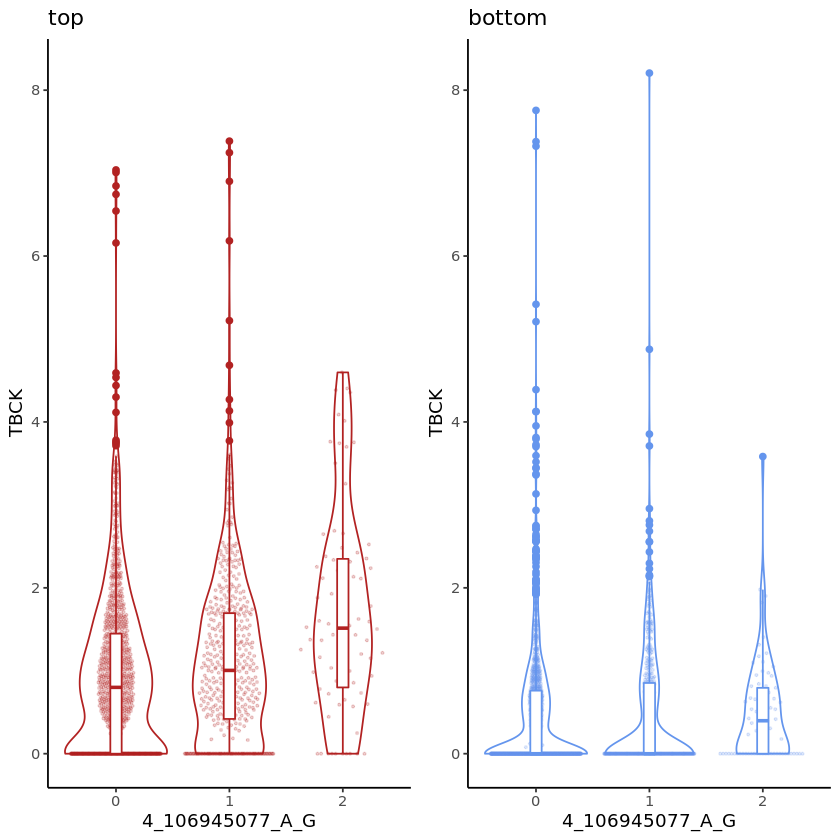

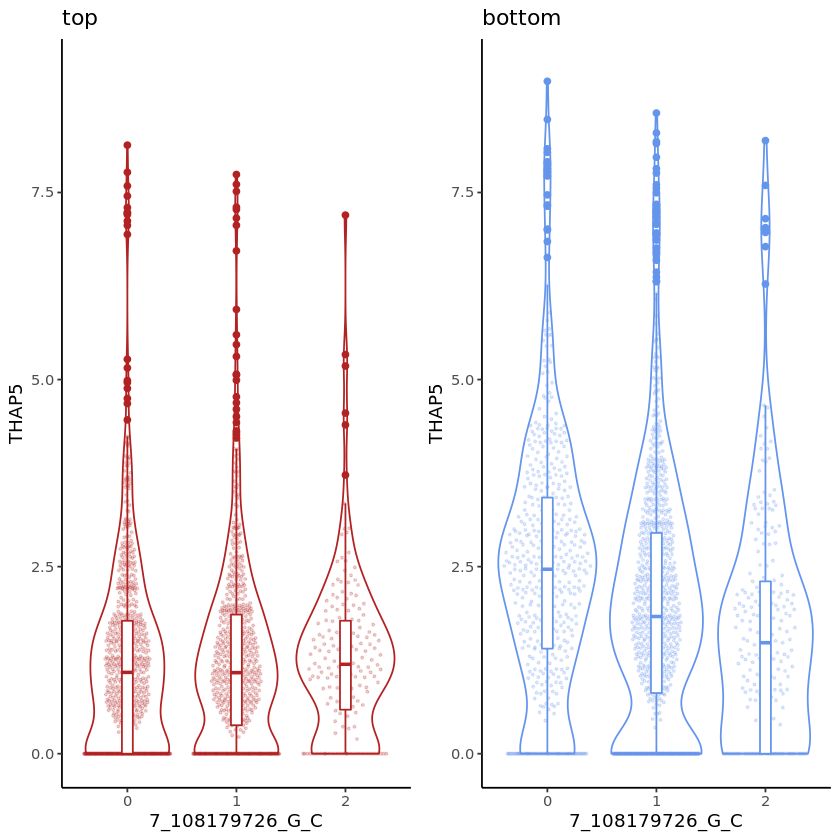

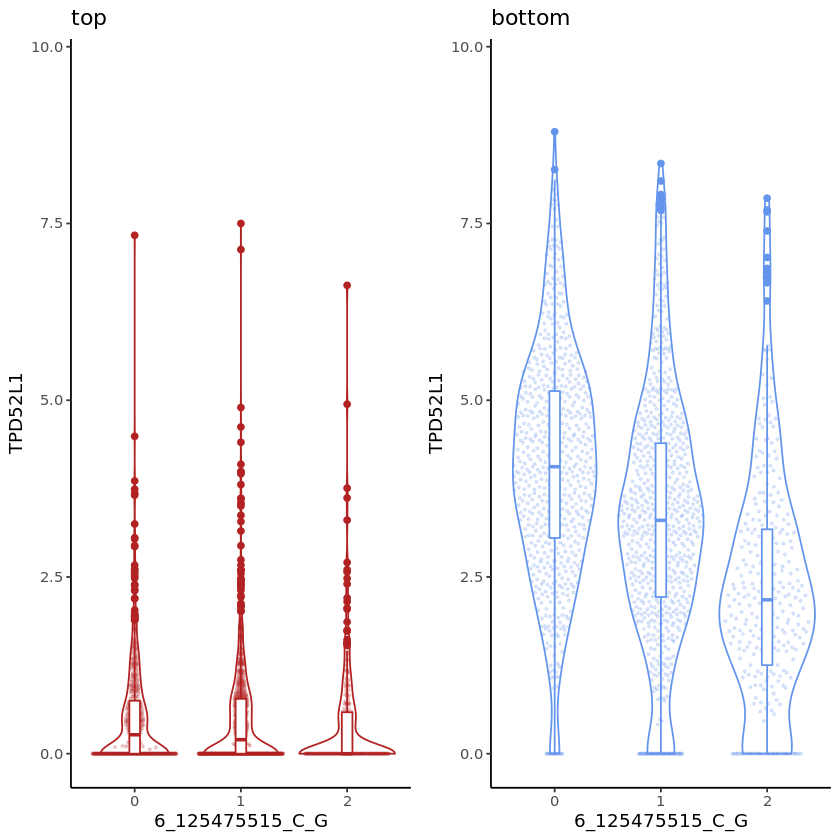

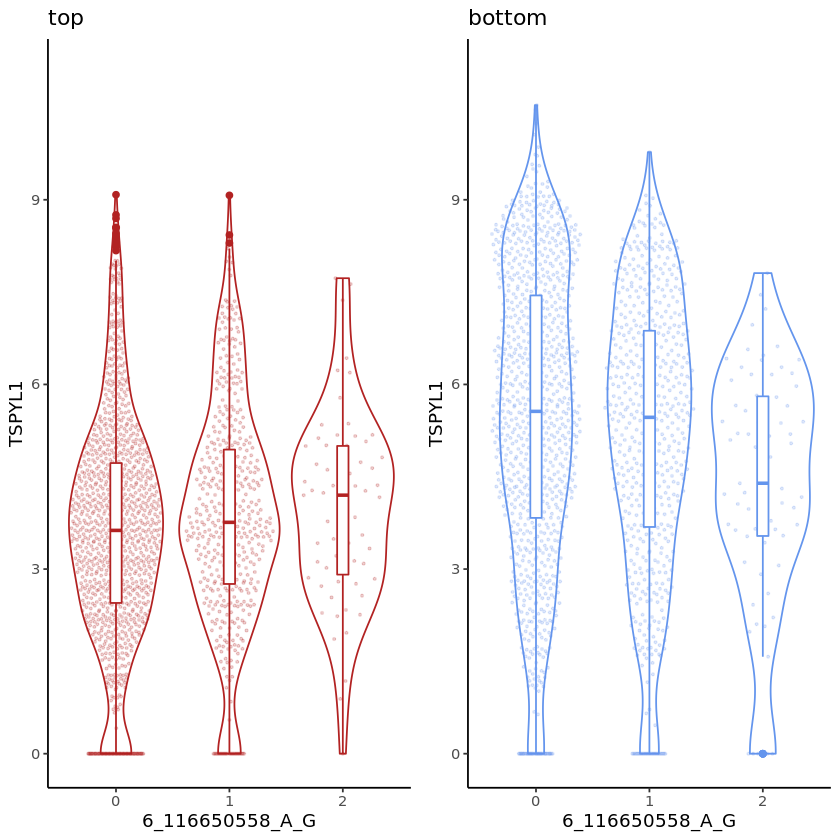

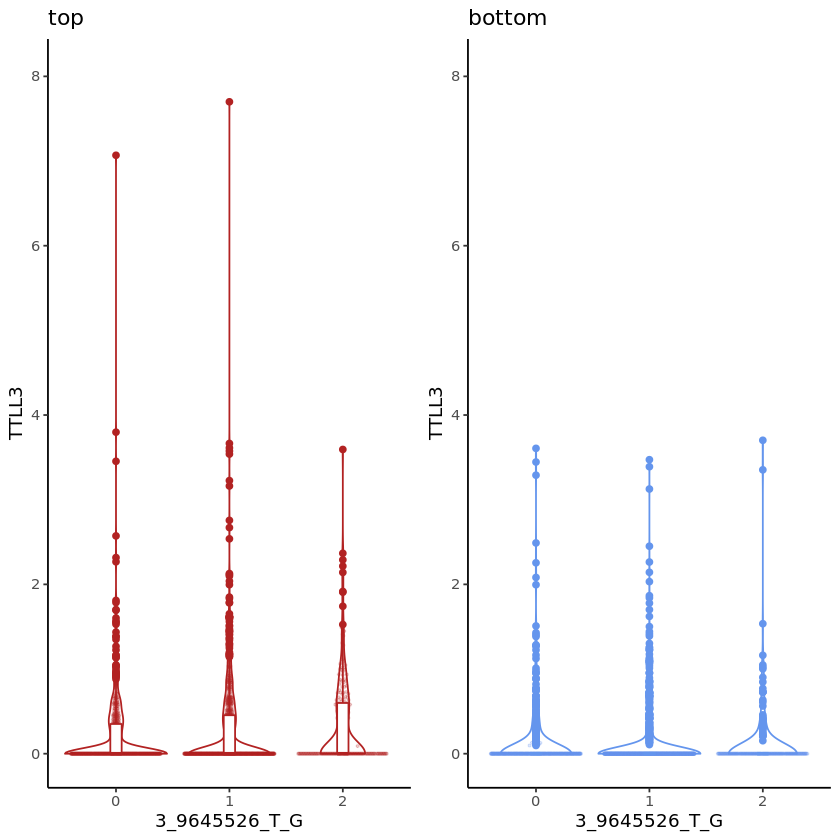

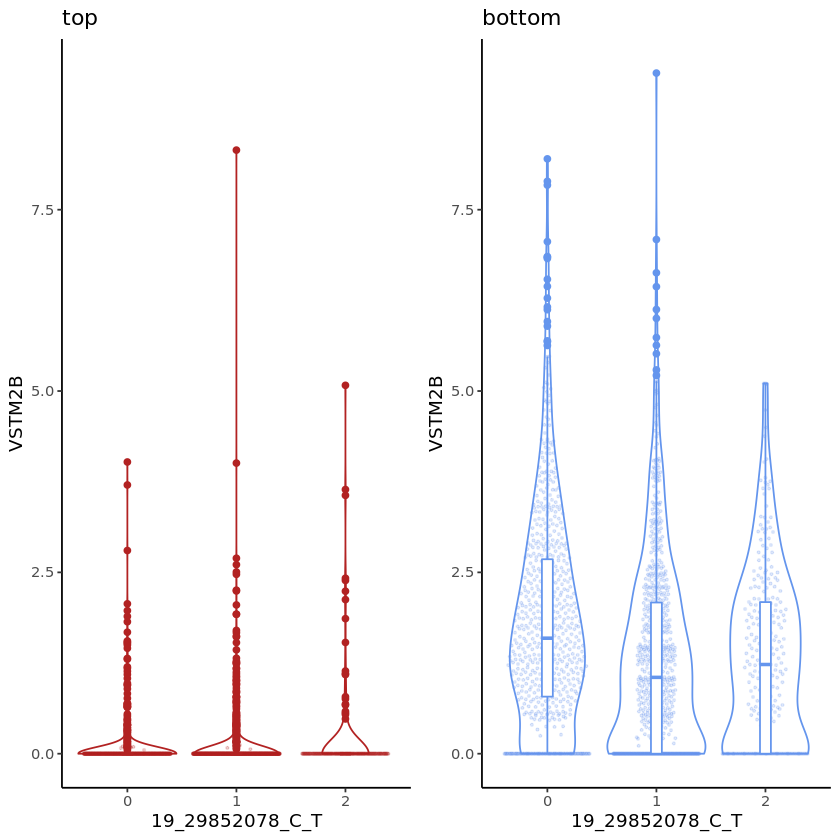

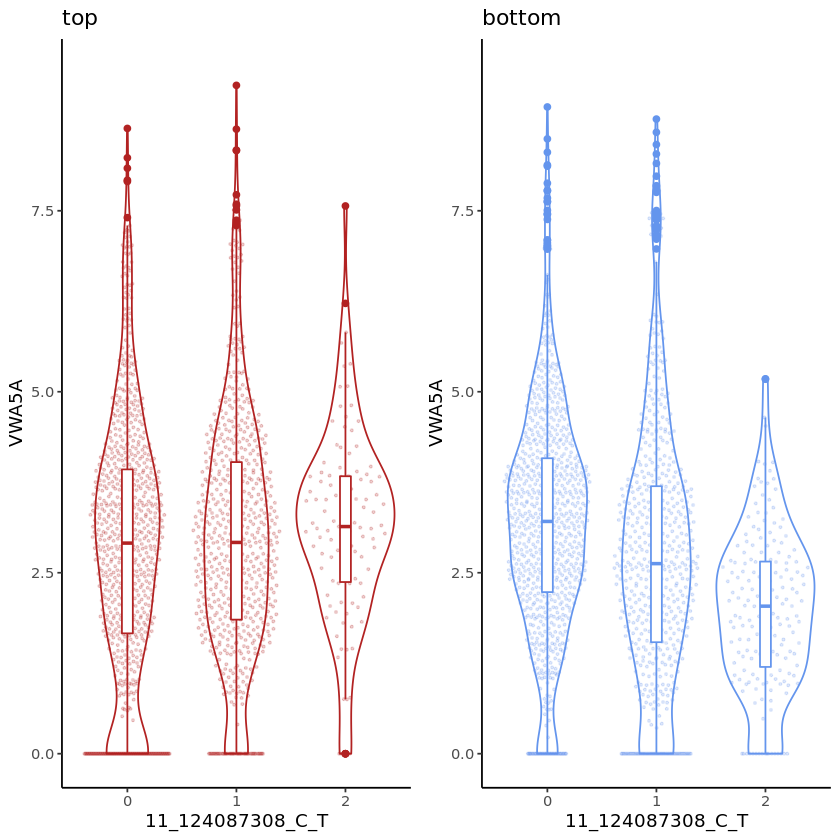

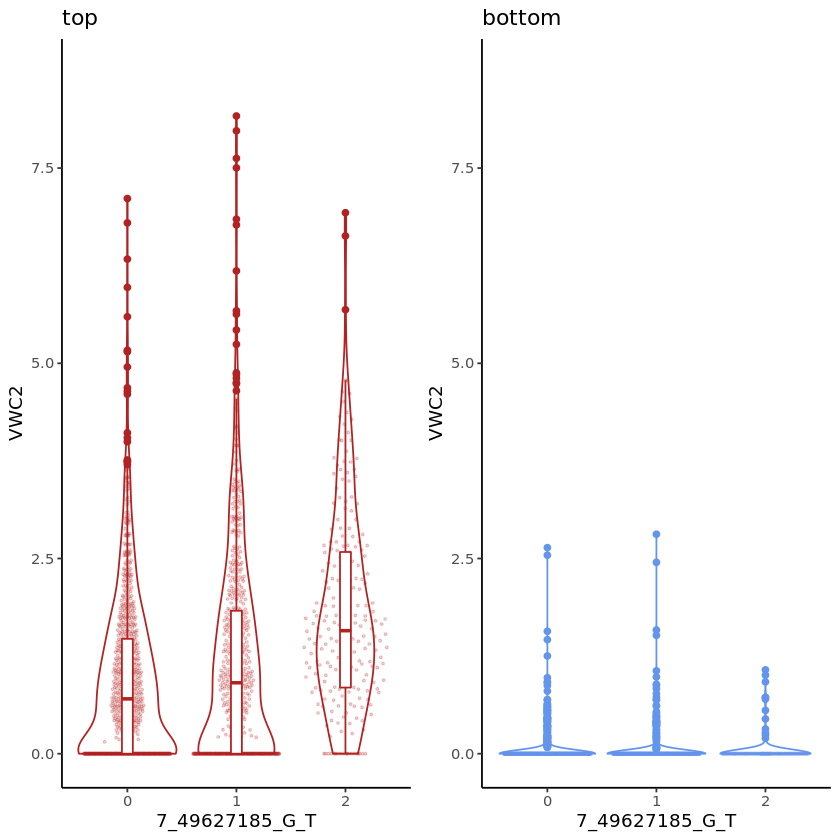

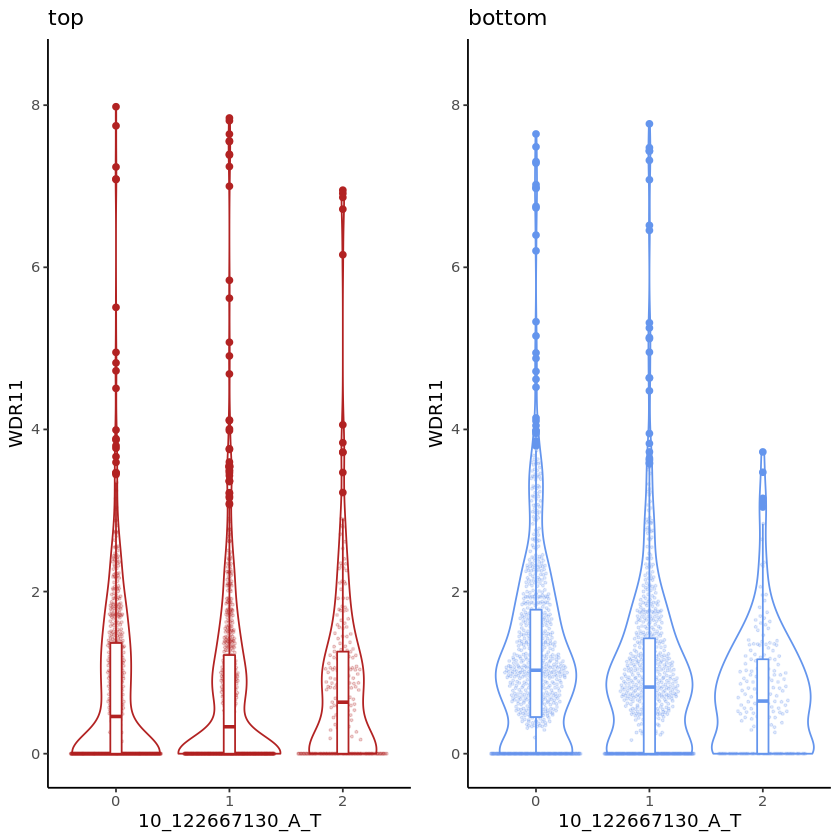

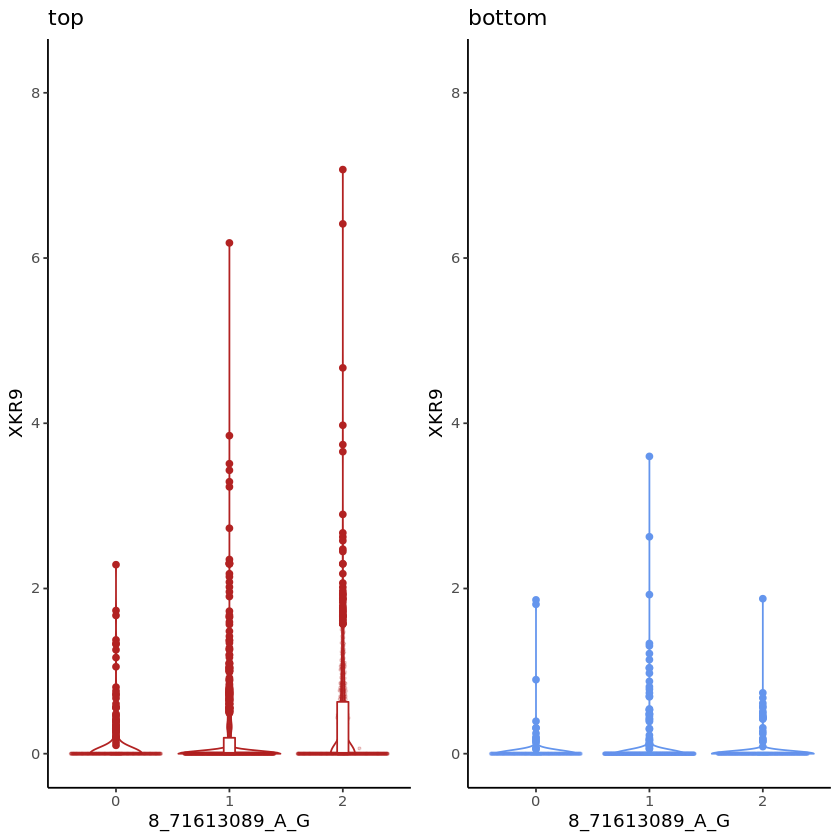

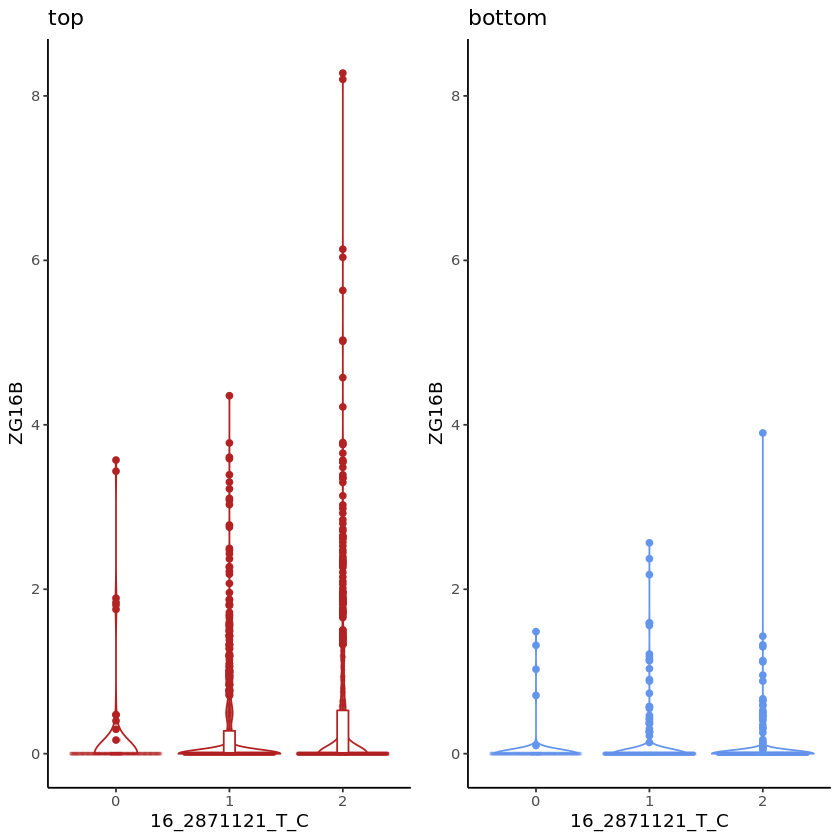

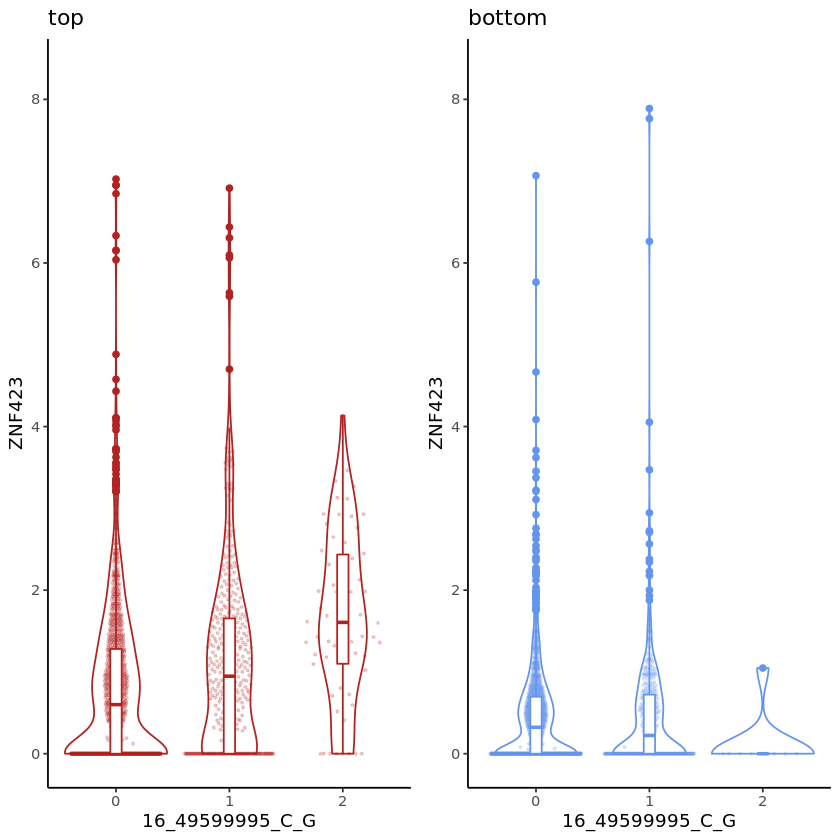

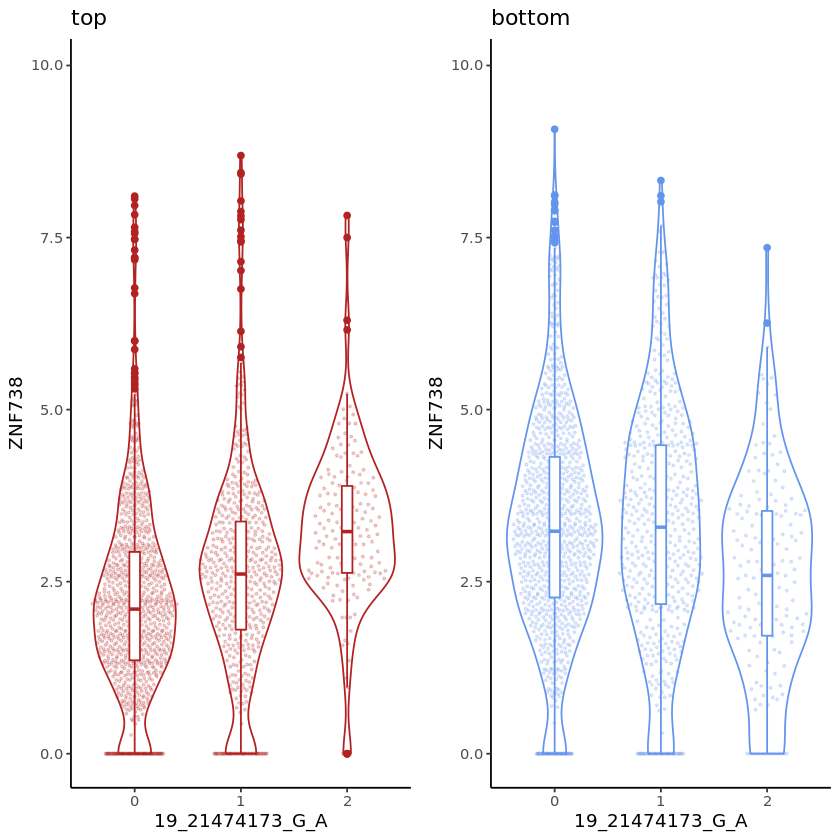

In [31]:
for (eqtl in eqtls){
#     print(eqtl)
    if (eqtl %in% skip_eqtls){next}
    snp = df_eqtl[rownames(df_eqtl) == eqtl,"snp_id"]
    gene = df_eqtl[rownames(df_eqtl) == eqtl,"gene"]
    # top pseudocells
    top_file = paste0(flip_folder,list.files(flip_folder)[grep(paste0(eqtl,"_top20quantile_pseudocells.csv"),list.files(flip_folder))])
    top=read.csv(top_file, row.names=1)
    top_pseudocells = as.character(top[,1])
    # bottom pseudocells
    bottom_file = paste0(flip_folder,list.files(flip_folder)[grep(paste0(eqtl,"_bottom20quantile_pseudocells.csv"),list.files(flip_folder))])
    bottom=read.csv(bottom_file, row.names=1)
    bottom_pseudocells = as.character(bottom[,1])
    # genotypes
    filename = paste0(mydir, myfiles[grep(gene, myfiles)])
    df_g = read.csv(filename)
    colnames(df_g)[1] = "donor"  
    # expression (phenotype)
    df_e = data.frame(pseudocell = colnames(df0), Expression = df0[gene,])
    df_e$donor = gsub("--.*","",df_e$pseudocell)
    # merge
    df_ge = inner_join(df_e, df_g, by="donor")
    M = max(df_ge$Expression)
    # prepare plots
    df1 = df_ge[df_ge$pseudocell %in% top_pseudocells,]
    p1 = ggplot(df1,aes(x = as.factor(Genotype),y=Expression)) + theme_classic() + ggtitle("top")
    p1 = p1 + xlab(snp) + ylab(gene) + geom_violin(col="firebrick") + ylim(c(0,M))
    p1 = p1 + geom_quasirandom(size=0.5, alpha=0.2, col="firebrick") + geom_boxplot(width=0.1, col="firebrick")
    df2 = df_ge[df_ge$pseudocell %in% bottom_pseudocells,]
    p2 = ggplot(df2,aes(x = as.factor(Genotype),y=Expression)) + theme_classic() + ggtitle("bottom")
    p2 = p2 + xlab(snp) + ylab(gene) + geom_violin(col="cornflowerblue") + ylim(c(0,M))
    p2 = p2 + geom_quasirandom(size=0.5, alpha=0.2, col="cornflowerblue") + geom_boxplot(width=0.1, col="cornflowerblue")
    print(plot_grid(p1,p2,ncol=2))
}

In [40]:
summary_df = data.frame(eqtl = eqtls[!(eqtls %in% skip_eqtls)], beta_top=0, beta_bottom=0, 
                        beta_se_top=0, beta_se_bottom=0, pv_top=1, pv_bottom=1)

In [41]:
for (eqtl in eqtls){
#     print(eqtl)
    if (eqtl %in% skip_eqtls){next}
    snp = df_eqtl[rownames(df_eqtl) == eqtl,"snp_id"]
    gene = df_eqtl[rownames(df_eqtl) == eqtl,"gene"]
    # top pseudocells
    top_file = paste0(flip_folder,list.files(flip_folder)[grep(paste0(eqtl,"_top20quantile_pseudocells.csv"),list.files(flip_folder))])
    top=read.csv(top_file, row.names=1)
    top_pseudocells = as.character(top[,1])
    # bottom pseudocells
    bottom_file = paste0(flip_folder,list.files(flip_folder)[grep(paste0(eqtl,"_bottom20quantile_pseudocells.csv"),list.files(flip_folder))])
    bottom=read.csv(bottom_file, row.names=1)
    bottom_pseudocells = as.character(bottom[,1])
    # genotypes
    filename = paste0(mydir, myfiles[grep(gene, myfiles)])
    df_g = read.csv(filename)
    colnames(df_g)[1] = "donor"  
    # expression (phenotype)
    df_e = data.frame(pseudocell = colnames(df0), Expression = df0[gene,])
    df_e$donor = gsub("--.*","",df_e$pseudocell)
    # merge
    df_ge = inner_join(df_e, df_g, by="donor")
    # top
    df1 = df_ge[df_ge$pseudocell %in% top_pseudocells,]
    lm = lm(Expression ~ Genotype, data = df1)
    beta1 = coef(lm)[2]
    beta_se1 = summary(lm)$coefficients[2,2] 
    pv1 = summary(lm)$coefficients[2,4] 
    # bottom
    df2 = df_ge[df_ge$pseudocell %in% bottom_pseudocells,]
    lm = lm(Expression ~ Genotype, data = df2)
    beta_se2 = summary(lm)$coefficients[2,2]
    beta2 = coef(lm)[2]
    pv2 = summary(lm)$coefficients[2,4] 
    summary_df[summary_df$eqtl == eqtl, "beta_top"] = beta1
    summary_df[summary_df$eqtl == eqtl, "beta_bottom"] = beta2
    summary_df[summary_df$eqtl == eqtl, "beta_se_top"] = beta_se1
    summary_df[summary_df$eqtl == eqtl, "beta_se_bottom"] = beta_se2
    summary_df[summary_df$eqtl == eqtl, "pv_top"] = pv1
    summary_df[summary_df$eqtl == eqtl, "pv_bottom"] = pv2
}

In [38]:
summary(lm)


Call:
lm(formula = Expression ~ Genotype, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3628 -1.0584 -0.0804  1.0488  5.7111 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.36281    0.05180  64.923  < 2e-16 ***
Genotype    -0.23923    0.06082  -3.933 8.72e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.666 on 1669 degrees of freedom
Multiple R-squared:  0.009185,	Adjusted R-squared:  0.008591 
F-statistic: 15.47 on 1 and 1669 DF,  p-value: 8.718e-05


In [39]:
summary(lm)$coefficients[2,2] 

[1] 0.06081955

In [42]:
head(summary_df)

eqtl                    beta_top   beta_bottom  beta_se_top beta_se_bottom
1 ABHD12B-14_51328222_C_T 0.01259404 -0.251275648 0.01354299  0.023188167   
2 ADSL-22_40757228_A_C    0.45664549 -0.069643491 0.08163057  0.087602675   
3 AIM1L-1_26673825_C_T    0.13859081  0.058506328 0.02194199  0.021931552   
4 ALDH7A1-5_126011412_G_A 0.54471868  0.073115451 0.08155943  0.084624751   
5 ANKRD18B-9_33524775_C_A 0.05686478  0.006848767 0.01135859  0.004573128   
6 BATF3-1_212852832_T_C   0.13523717 -0.001157855 0.02312108  0.011366330   
  pv_top       pv_bottom   
1 3.525413e-01 1.722813e-26
2 2.587780e-08 4.267308e-01
3 3.428819e-10 7.711610e-03
4 3.271249e-11 3.877142e-01
5 6.134502e-07 1.344234e-01
6 5.935374e-09 9.188744e-01

In [286]:
nrow(summary_df)
nrow(summary_df[summary_df$beta_top*summary_df$beta_bottom<0,])
nrow(summary_df[summary_df$beta_top*summary_df$beta_bottom<0 & summary_df$pv_top<0.05 & summary_df$pv_bottom<0.05,])

[1] 68

[1] 40

[1] 9

In [36]:
68/213
40/68

[1] 0.3192488

[1] 0.5882353

In [47]:
summary_df$replicates = "no"
summary_df[summary_df$beta_top*summary_df$beta_bottom<0,"replicates"] = "yes"

In [48]:
summary_df$replicates_sign = "no"
summary_df[summary_df$beta_top*summary_df$beta_bottom<0 & summary_df$pv_top<0.05 & summary_df$pv_bottom<0.05,"replicates_sign"] = "yes"

In [44]:
flips_filename = paste0(beta_dir, "eqtl_with_flip_sign.csv")
flips_df = read.csv(flips_filename)
colnames(flips_df)[1] = "eqtl"
head(flips_df)

eqtl                    beta_G      n        
1 ABHD12B-14_51328222_C_T -0.10783378 0.2393439
2 ADSL-22_40757228_A_C     0.09485572 0.6827107
3 AIM1L-1_26673825_C_T     0.04175069 0.7204262
4 AKAP7-6_131691964_C_A    0.17694359 0.7383860
5 ALDH7A1-5_126011412_G_A  0.13257557 0.7406609
6 ANKRD18B-9_33524775_C_A  0.07399059 0.8421935

In [45]:
df0 = inner_join(flips_df, summary_df, by="eqtl")

In [49]:
head(df0)

eqtl                    beta_G      n         beta_top   beta_bottom 
1 ABHD12B-14_51328222_C_T -0.10783378 0.2393439 0.01259404 -0.251275648
2 ADSL-22_40757228_A_C     0.09485572 0.6827107 0.45664549 -0.069643491
3 AIM1L-1_26673825_C_T     0.04175069 0.7204262 0.13859081  0.058506328
4 ALDH7A1-5_126011412_G_A  0.13257557 0.7406609 0.54471868  0.073115451
5 ANKRD18B-9_33524775_C_A  0.07399059 0.8421935 0.05686478  0.006848767
6 BATF3-1_212852832_T_C    0.06635896 0.5977011 0.13523717 -0.001157855
  beta_se_top beta_se_bottom pv_top       pv_bottom   
1 0.01354299  0.023188167    3.525413e-01 1.722813e-26
2 0.08163057  0.087602675    2.587780e-08 4.267308e-01
3 0.02194199  0.021931552    3.428819e-10 7.711610e-03
4 0.08155943  0.084624751    3.271249e-11 3.877142e-01
5 0.01135859  0.004573128    6.134502e-07 1.344234e-01
6 0.02312108  0.011366330    5.935374e-09 9.188744e-01

In [50]:
write.csv(df0, paste0(beta_dir,"eqtl_with_flip_sign_replication.csv"))

In [5]:
df0 = read.csv(paste0(beta_dir,"eqtl_with_flip_sign_replication.csv"))
head(df0)

X eqtl                    beta_G      n         beta_top   beta_bottom 
1 1 ABHD12B-14_51328222_C_T -0.10783378 0.2393439 0.01259404 -0.251275648
2 2 ADSL-22_40757228_A_C     0.09485572 0.6827107 0.45664549 -0.069643491
3 3 AIM1L-1_26673825_C_T     0.04175069 0.7204262 0.13859081  0.058506328
4 4 ALDH7A1-5_126011412_G_A  0.13257557 0.7406609 0.54471868  0.073115451
5 5 ANKRD18B-9_33524775_C_A  0.07399059 0.8421935 0.05686478  0.006848767
6 6 BATF3-1_212852832_T_C    0.06635896 0.5977011 0.13523717 -0.001157855
  beta_se_top beta_se_bottom pv_top       pv_bottom   
1 0.01354299  0.023188167    3.525413e-01 1.722813e-26
2 0.08163057  0.087602675    2.587780e-08 4.267308e-01
3 0.02194199  0.021931552    3.428819e-10 7.711610e-03
4 0.08155943  0.084624751    3.271249e-11 3.877142e-01
5 0.01135859  0.004573128    6.134502e-07 1.344234e-01
6 0.02312108  0.011366330    5.935374e-09 9.188744e-01

ERROR while rich displaying an object: Error in is.factor(x): object 'replicates' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(c

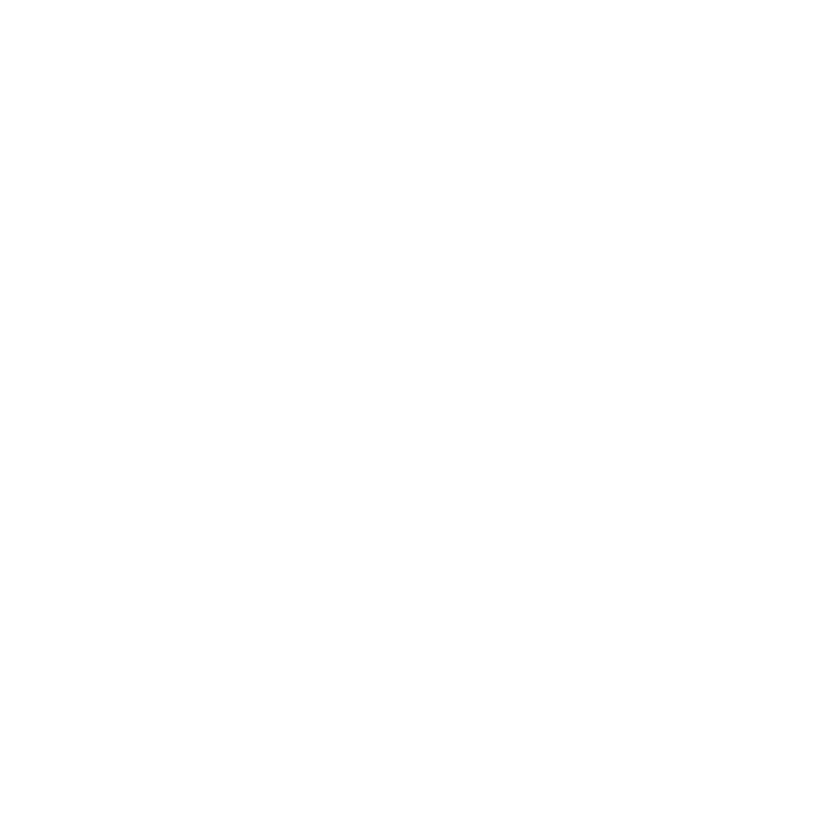

In [4]:
ggplot(df0, aes(x=as.factor(replicates), y=n)) + geom_boxplot()
ggplot(df0, aes(x=as.factor(replicates_sign), y=n)) + geom_boxplot()
ggplot(df0, aes(x=as.factor(replicates_sign), y=beta_G)) + geom_boxplot()

In [251]:
eqtl

[1] "ZNF77-19_2936535_G_A"

In [250]:
top_file = paste0(flip_folder,list.files(flip_folder)[grep(paste0(eqtl,"_top20quantile_pseudocells.csv"),list.files(flip_folder))])
top=read.csv(top_file, row.names=1)
head(top)

ZNF77.19_2936535_G_A         
1 HPSI0115i-paim_1--DA--d30--38
2 HPSI0114i-eipl_1--DA--d30--5 
3 HPSI0614i-uevq_6--DA--d30--15
4 HPSI1014i-quls_2--DA--d30--1 
5 HPSI1014i-quls_2--DA--d30--4 
6 HPSI1014i-quls_2--DA--d30--7

In [252]:
top_pseudocells = as.character(top[,1])

In [253]:
head(top_pseudocells)

[1] "HPSI0115i-paim_1--DA--d30--38" "HPSI0114i-eipl_1--DA--d30--5" 
[3] "HPSI0614i-uevq_6--DA--d30--15" "HPSI1014i-quls_2--DA--d30--1" 
[5] "HPSI1014i-quls_2--DA--d30--4"  "HPSI1014i-quls_2--DA--d30--7"

In [254]:
head(df_ge[df_ge$pseudocell %in% top_pseudocells,])

pseudocell                    Expression donor            Genotype
64  HPSI0115i-paim_1--DA--d30--38 2.941304   HPSI0115i-paim_1 1       
167 HPSI0114i-eipl_1--DA--d30--5  2.906203   HPSI0114i-eipl_1 1       
412 HPSI0614i-uevq_6--DA--d30--15 5.837521   HPSI0614i-uevq_6 0       
544 HPSI1014i-quls_2--DA--d30--1  6.598642   HPSI1014i-quls_2 2       
547 HPSI1014i-quls_2--DA--d30--4  3.754271   HPSI1014i-quls_2 2       
550 HPSI1014i-quls_2--DA--d30--7  6.284086   HPSI1014i-quls_2 2

In [255]:
bottom_file = paste0(flip_folder,list.files(flip_folder)[grep(paste0(eqtl,"_bottom20quantile_pseudocells.csv"),list.files(flip_folder))])
bottom=read.csv(bottom_file, row.names=1)
head(bottom)

ZNF77.19_2936535_G_A         
1 HPSI0115i-paim_1--DA--d30--38
2 HPSI0114i-eipl_1--DA--d30--5 
3 HPSI0614i-uevq_6--DA--d30--15
4 HPSI1014i-quls_2--DA--d30--1 
5 HPSI1014i-quls_2--DA--d30--4 
6 HPSI1014i-quls_2--DA--d30--7

In [256]:
bottom_pseudocells = as.character(bottom[,1])

In [257]:
head(bottom_pseudocells)

[1] "HPSI0115i-paim_1--DA--d30--38" "HPSI0114i-eipl_1--DA--d30--5" 
[3] "HPSI0614i-uevq_6--DA--d30--15" "HPSI1014i-quls_2--DA--d30--1" 
[5] "HPSI1014i-quls_2--DA--d30--4"  "HPSI1014i-quls_2--DA--d30--7"